In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime
import esm_simulation, utilities
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from matplotlib import rcParams
import itertools
pv=!{sys.executable} --version
print(pv[0],'numpy ==', np.__version__, 'pyarrow ==',pyarrow.__version__, 'seaborn == ', sns.__version__)

c:\Users\hanisaf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Python 3.9.7 numpy == 1.23.1 pyarrow == 6.0.1 seaborn ==  0.11.2


In [2]:
# options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
mpl.rcParams['figure.dpi'] = 300
sns.set_style("ticks")
sns.set_palette("cubehelix")
font_scale = 3
sns.set_context("paper", font_scale=font_scale, rc={"lines.linewidth": 2, 'aspect':1})
# figure size in inches
#rcParams['figure.figsize'] = 11.7,8.27


In [3]:
def plot_his(df, ci=None, concise=True, title = None, legend=True, hue=None, x = 'Time Step',  
              ys=['Performance', 'Adoption', 'Interruptions', 'Metaknowledge Accuracy', 'Realized Metaknowledge', 'Leakiness',   ],  
             style='Worker Transparency Preference', col='Worker Interruption Tolerance'):
    n = len(ys)
    for i in range(n):
        ax=sns.relplot(aspect=1.5, kind="line", x=x, y=ys[i], col = col, style=style, hue=hue, ci=ci, data=df, legend=legend);#, ax=axs[i]);  
    if title:
        fig.suptitle(title, fontsize=16)

In [4]:
data = pd.read_parquet('esm_simulation.Simulation_main_his.parquet')
print(data.shape)
print(data.columns)
data.head()

(301320, 20)
Index(['Adoption', 'Configuration', 'Esm Interactivity',
       'Initial Esm Adoption', 'Initial Metaknowledge Accuracy',
       'Interruptions', 'Leakiness', 'Metaknowledge Accuracy',
       'Metaknowledge Decay Rate', 'Organization Size', 'Performance',
       'Realized Metaknowledge', 'Run', 'Seed', 'Simulation Time', 'Time Step',
       'Worker Aspiration', 'Worker Dependency',
       'Worker Interruption Tolerance', 'Worker Transparency Preference'],
      dtype='object')


Adoption  Configuration  Esm Interactivity  Initial Esm Adoption  \
0     0.790              0              0.100                 0.800   
1     0.790              0              0.100                 0.800   
2     0.790              0              0.100                 0.800   
3     0.790              0              0.100                 0.800   
4     0.790              0              0.100                 0.800   

   Initial Metaknowledge Accuracy  Interruptions  Leakiness  \
0                           0.000          0.000      0.013   
1                           0.000          0.000      0.000   
2                           0.000          0.000      0.000   
3                           0.000          0.000      0.000   
4                           0.000          0.000      0.000   

   Metaknowledge Accuracy  Metaknowledge Decay Rate  Organization Size  \
0                   0.000                     0.000                100   
1                   0.000                     0.000                100   
2                   0.000                     0.000                100   
3                   0.000                     0.000                100   
4                   0.000                     0.000                100   

   Performance  Realized Metaknowledge  Run  Seed  Simulation Time  Time Step  \
0        0.000                     NaN    0     0               30          0   
1        0.000                     NaN    0     0               30          1   
2        0.000                     NaN    0     0               30          2   
3        0.000                     NaN    0     0               30          3   
4        0.000                     NaN    0     0               30          4   

   Worker Aspiration  Worker Dependency  Worker Interruption Tolerance  \
0              1.000              0.100                             25   
1              1.000              0.100                             25   
2              1.000              0.100                             25   
3              1.000              0.100                             25   
4              1.000              0.100                             25   

   Worker Transparency Preference  
0                               1  
1                               1  
2                               1  
3                               1  
4                               1

In [5]:
data1 = data[data['Esm Interactivity']==0.1]
data2 = data[data['Esm Interactivity']==0.5]
data3 = data[data['Esm Interactivity']==0.9]

# Figure in the paper
## ESM Interactivity == 0.5

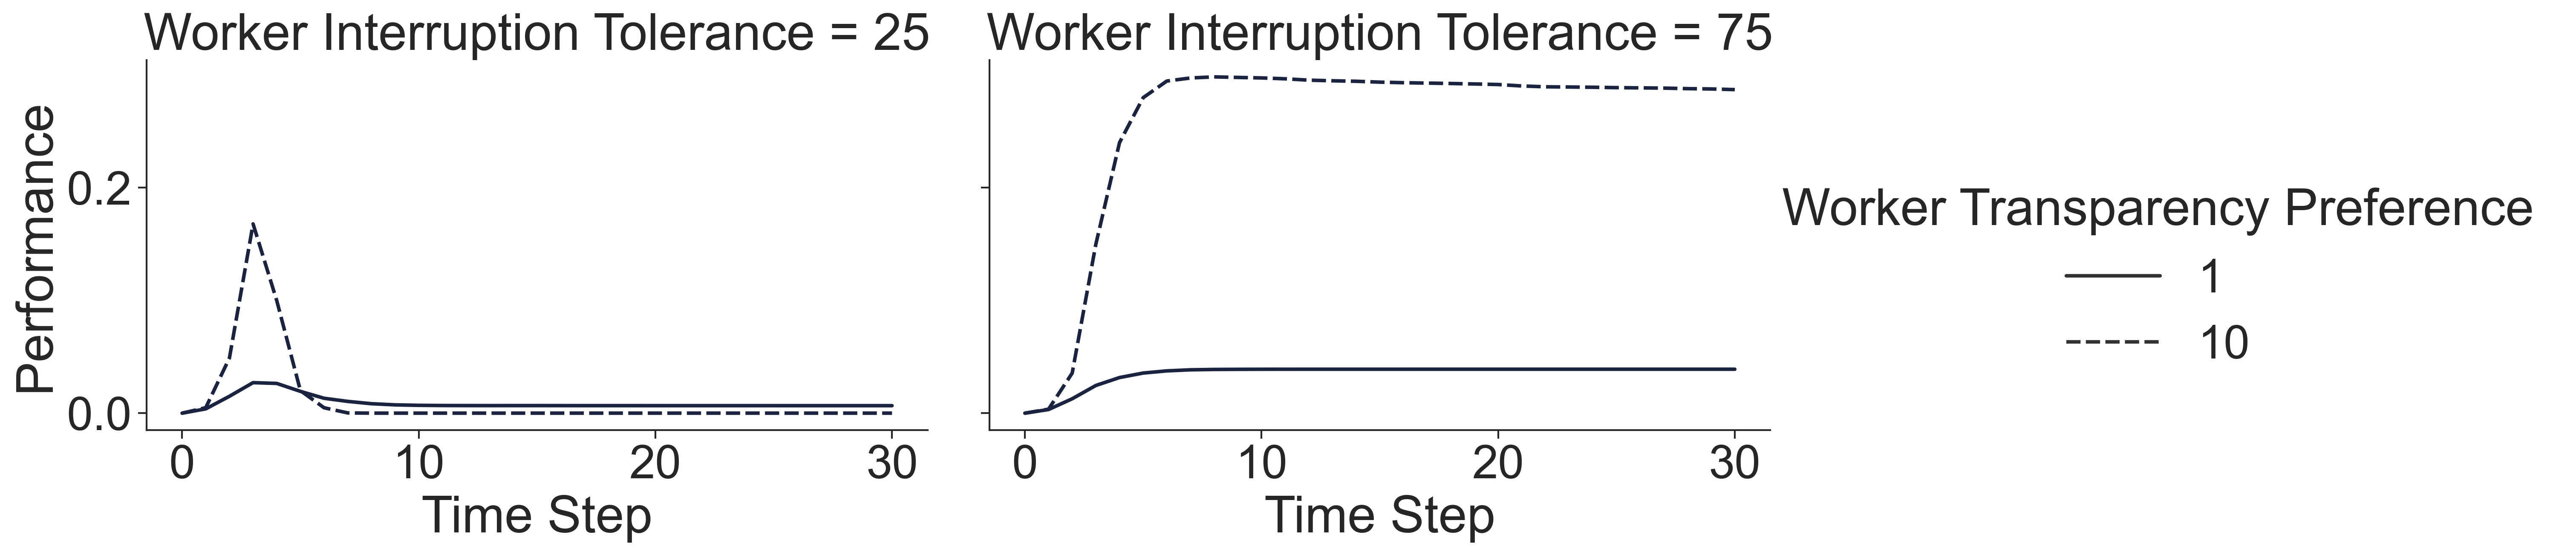

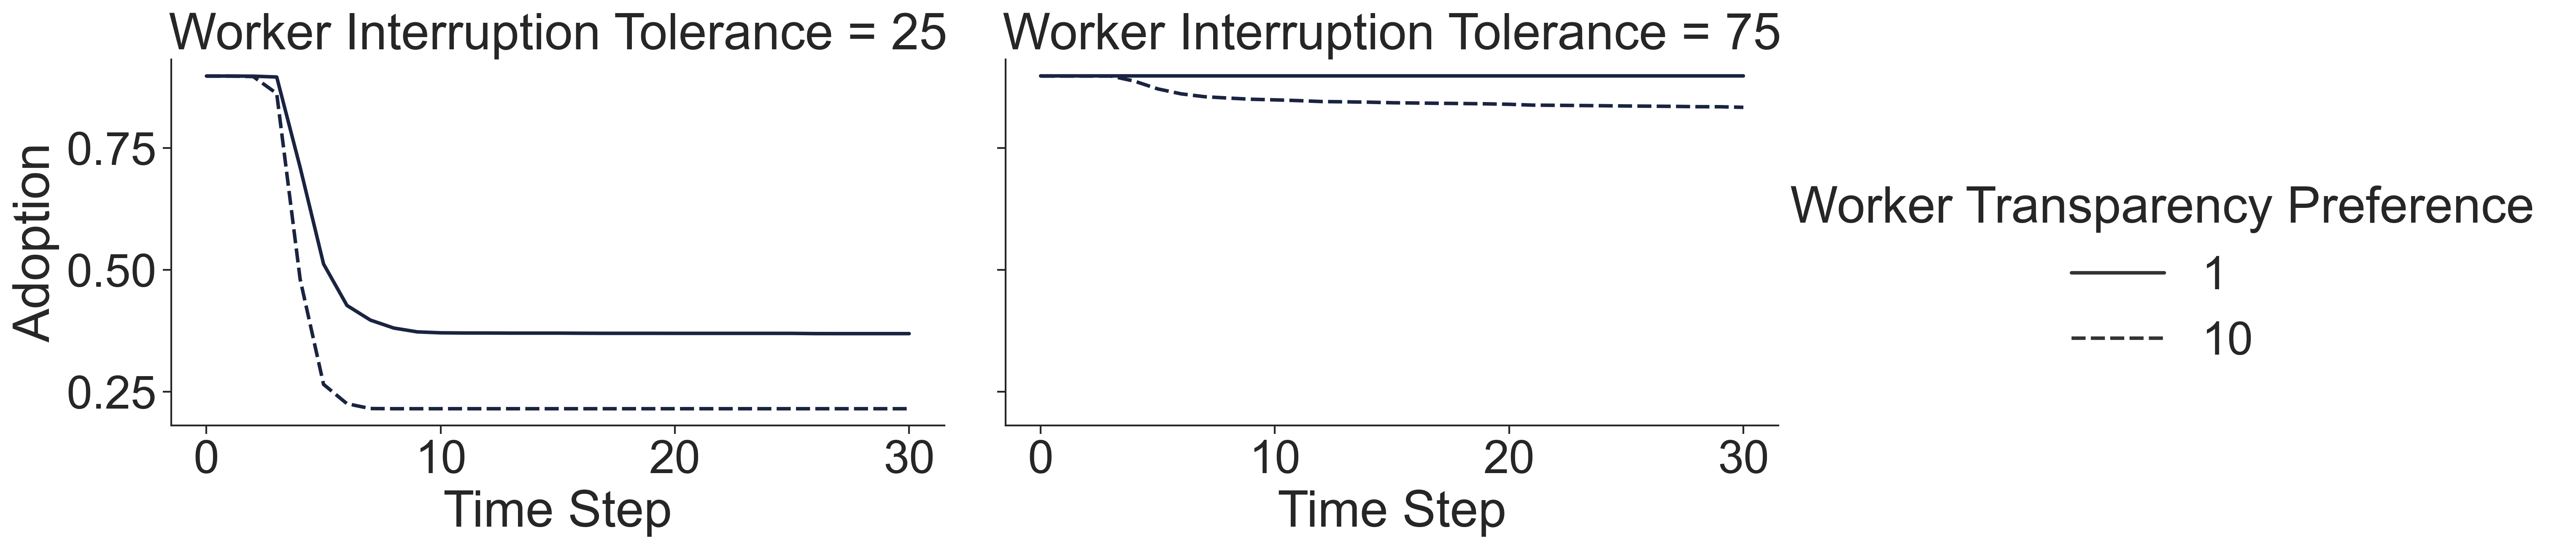

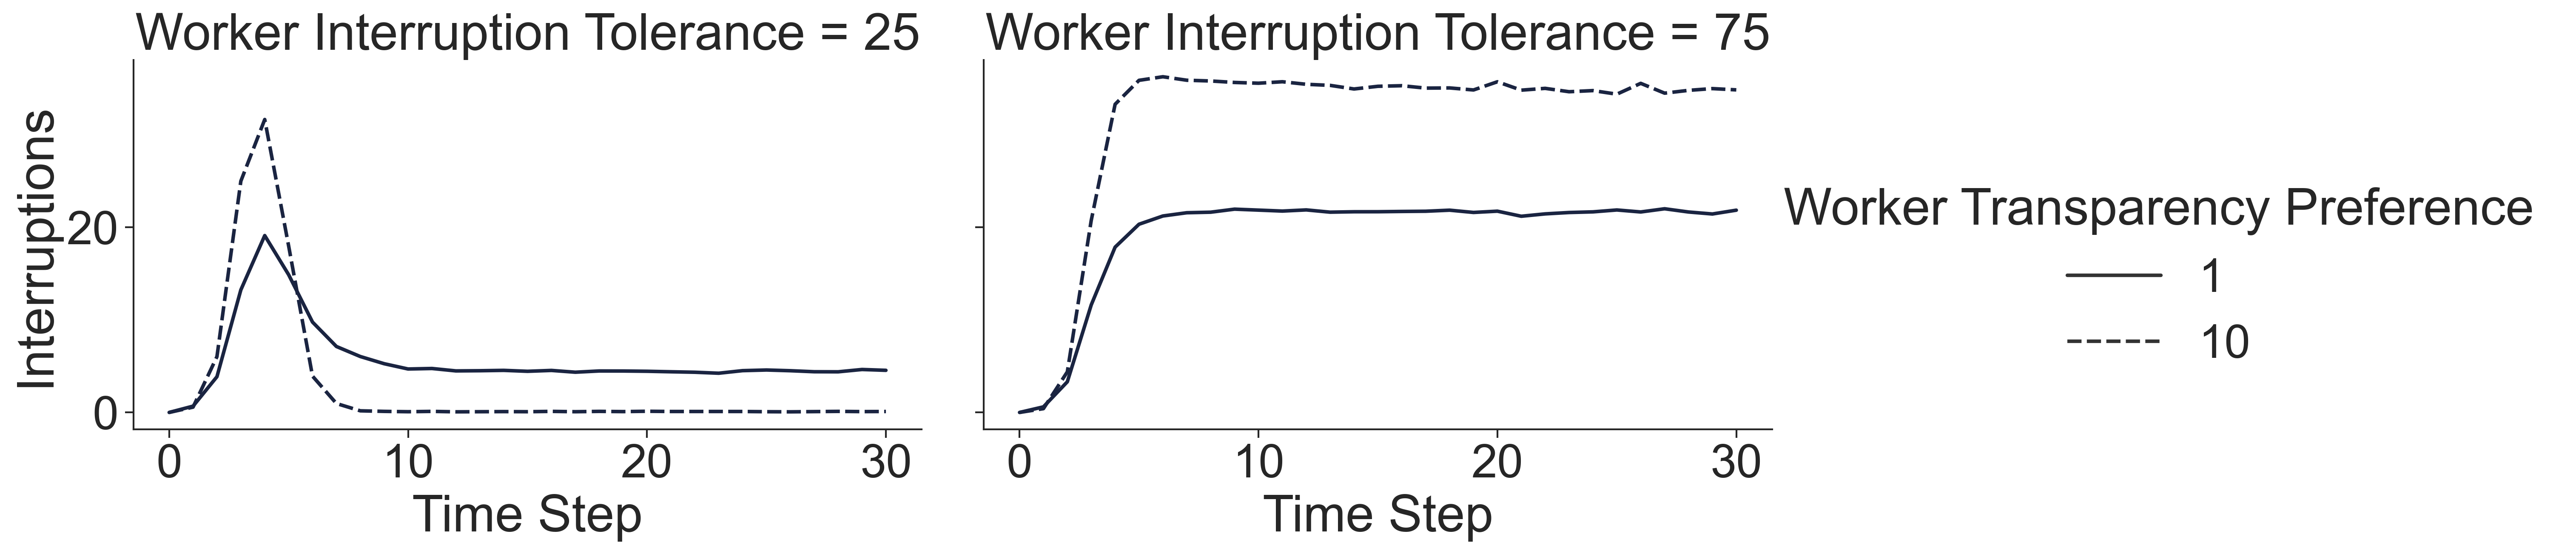

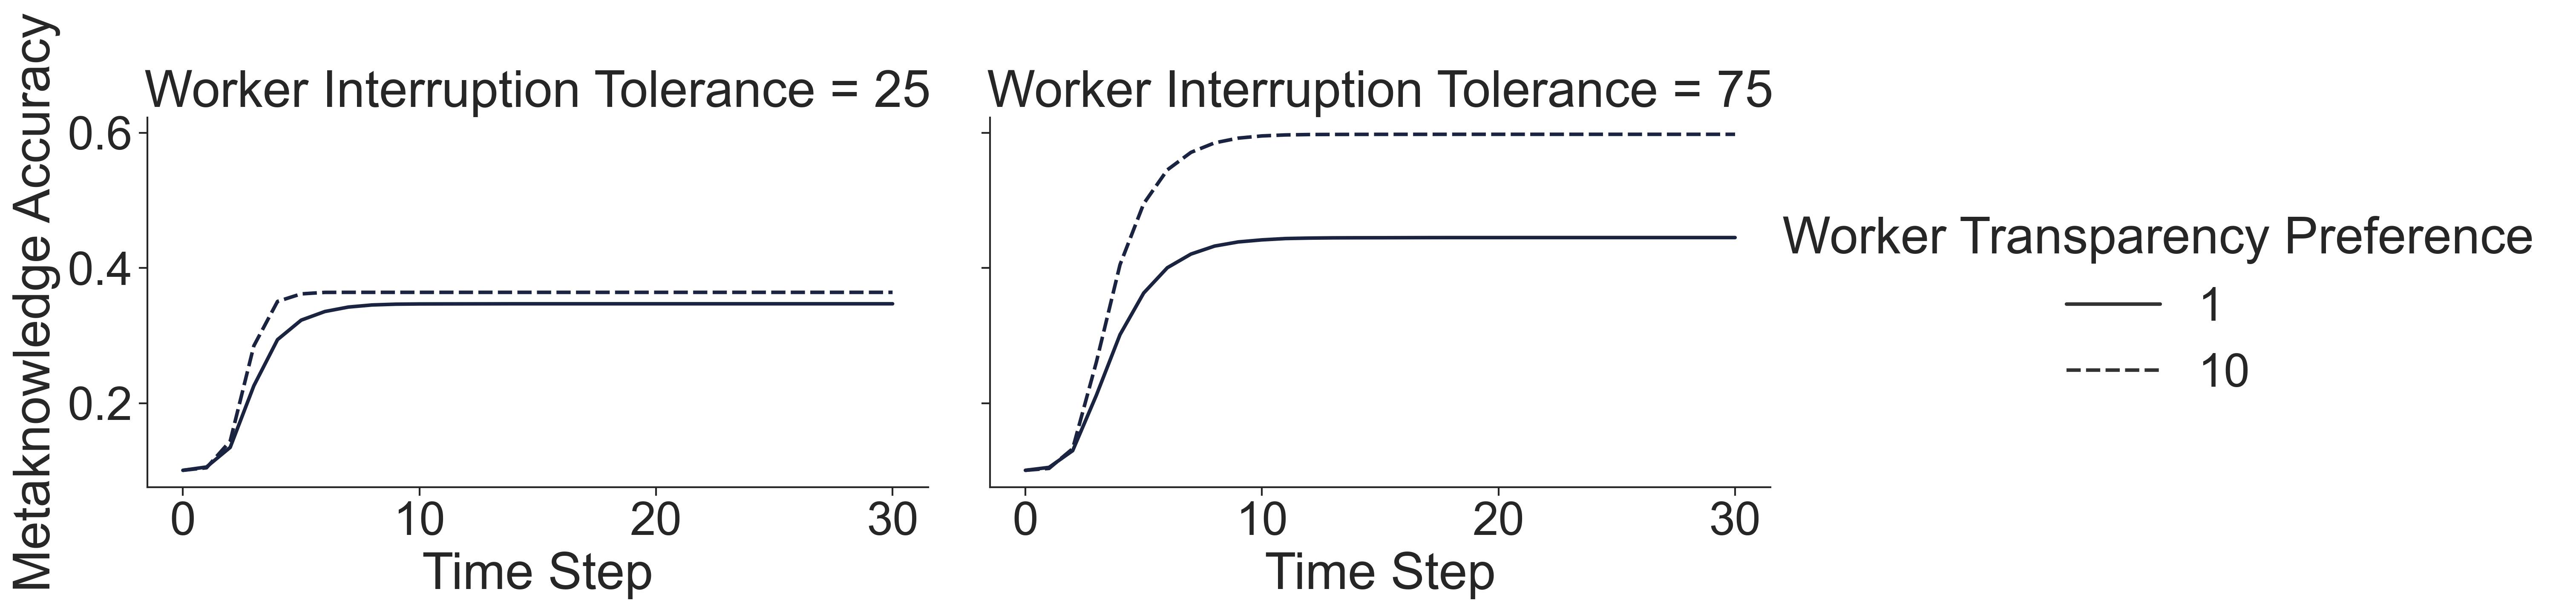

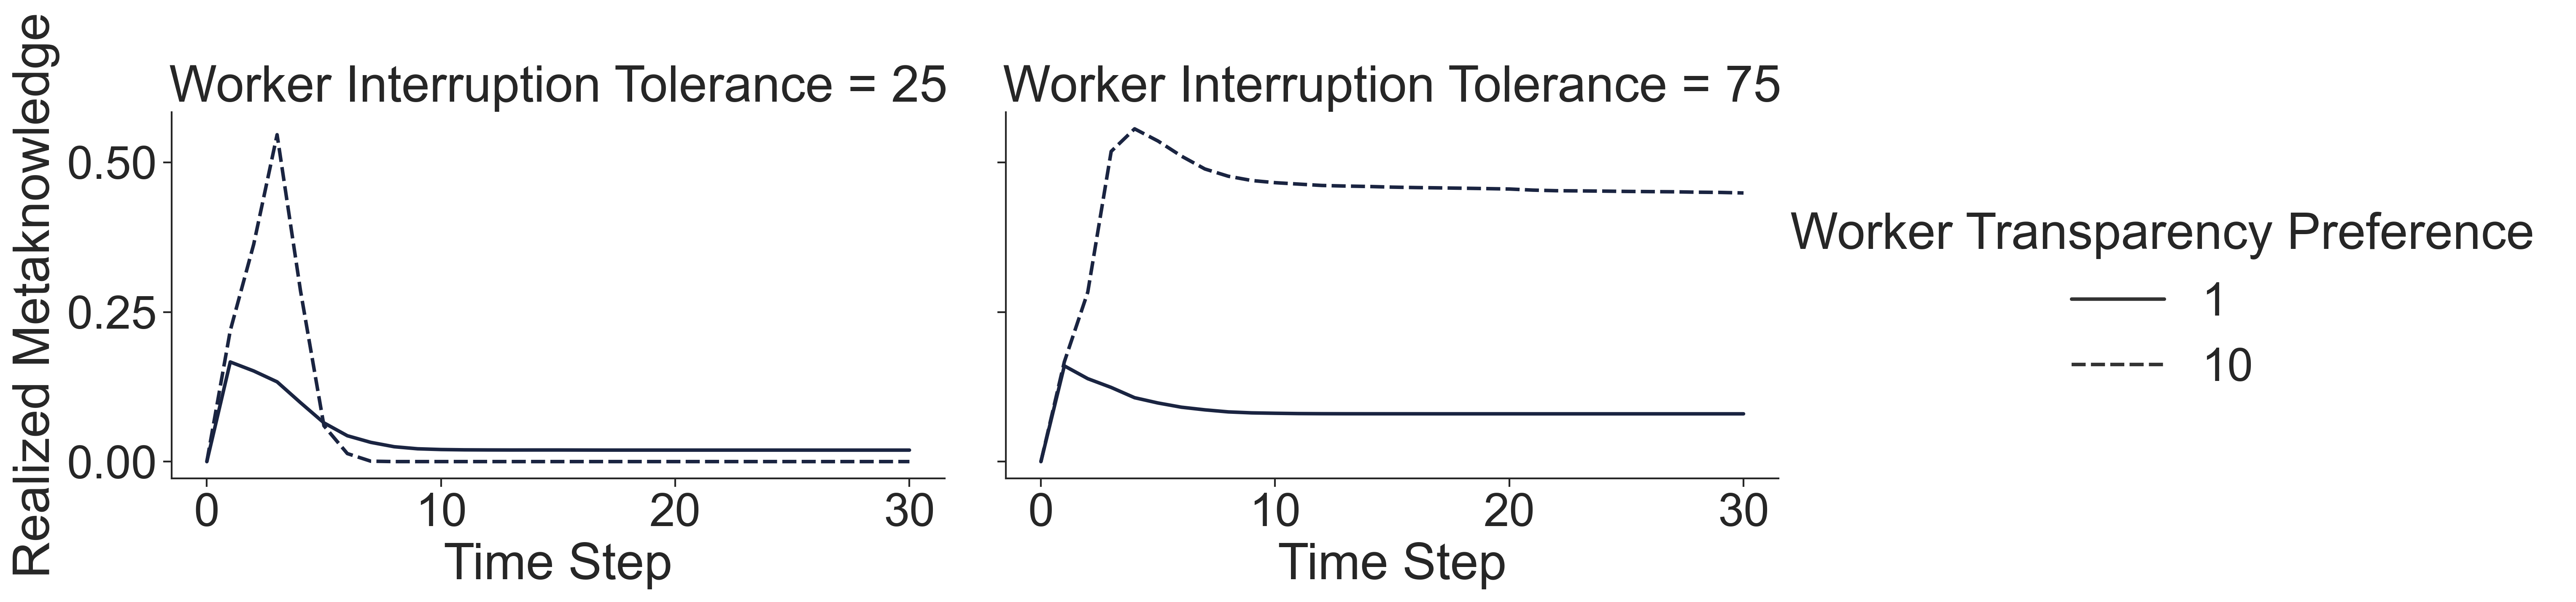

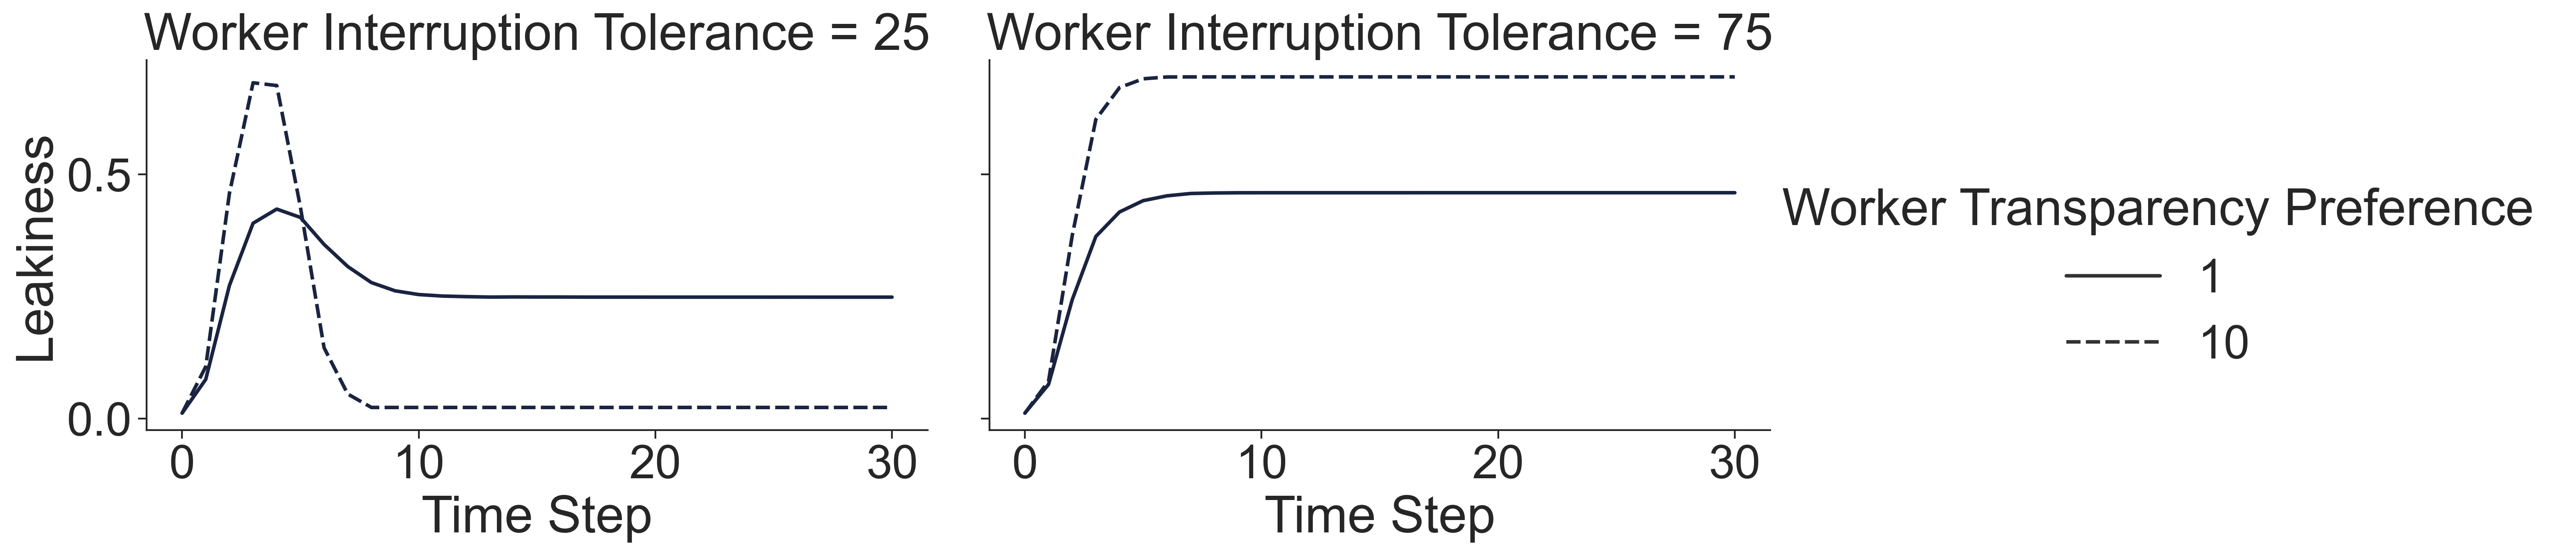

In [6]:
plot_his(data2, legend=True)

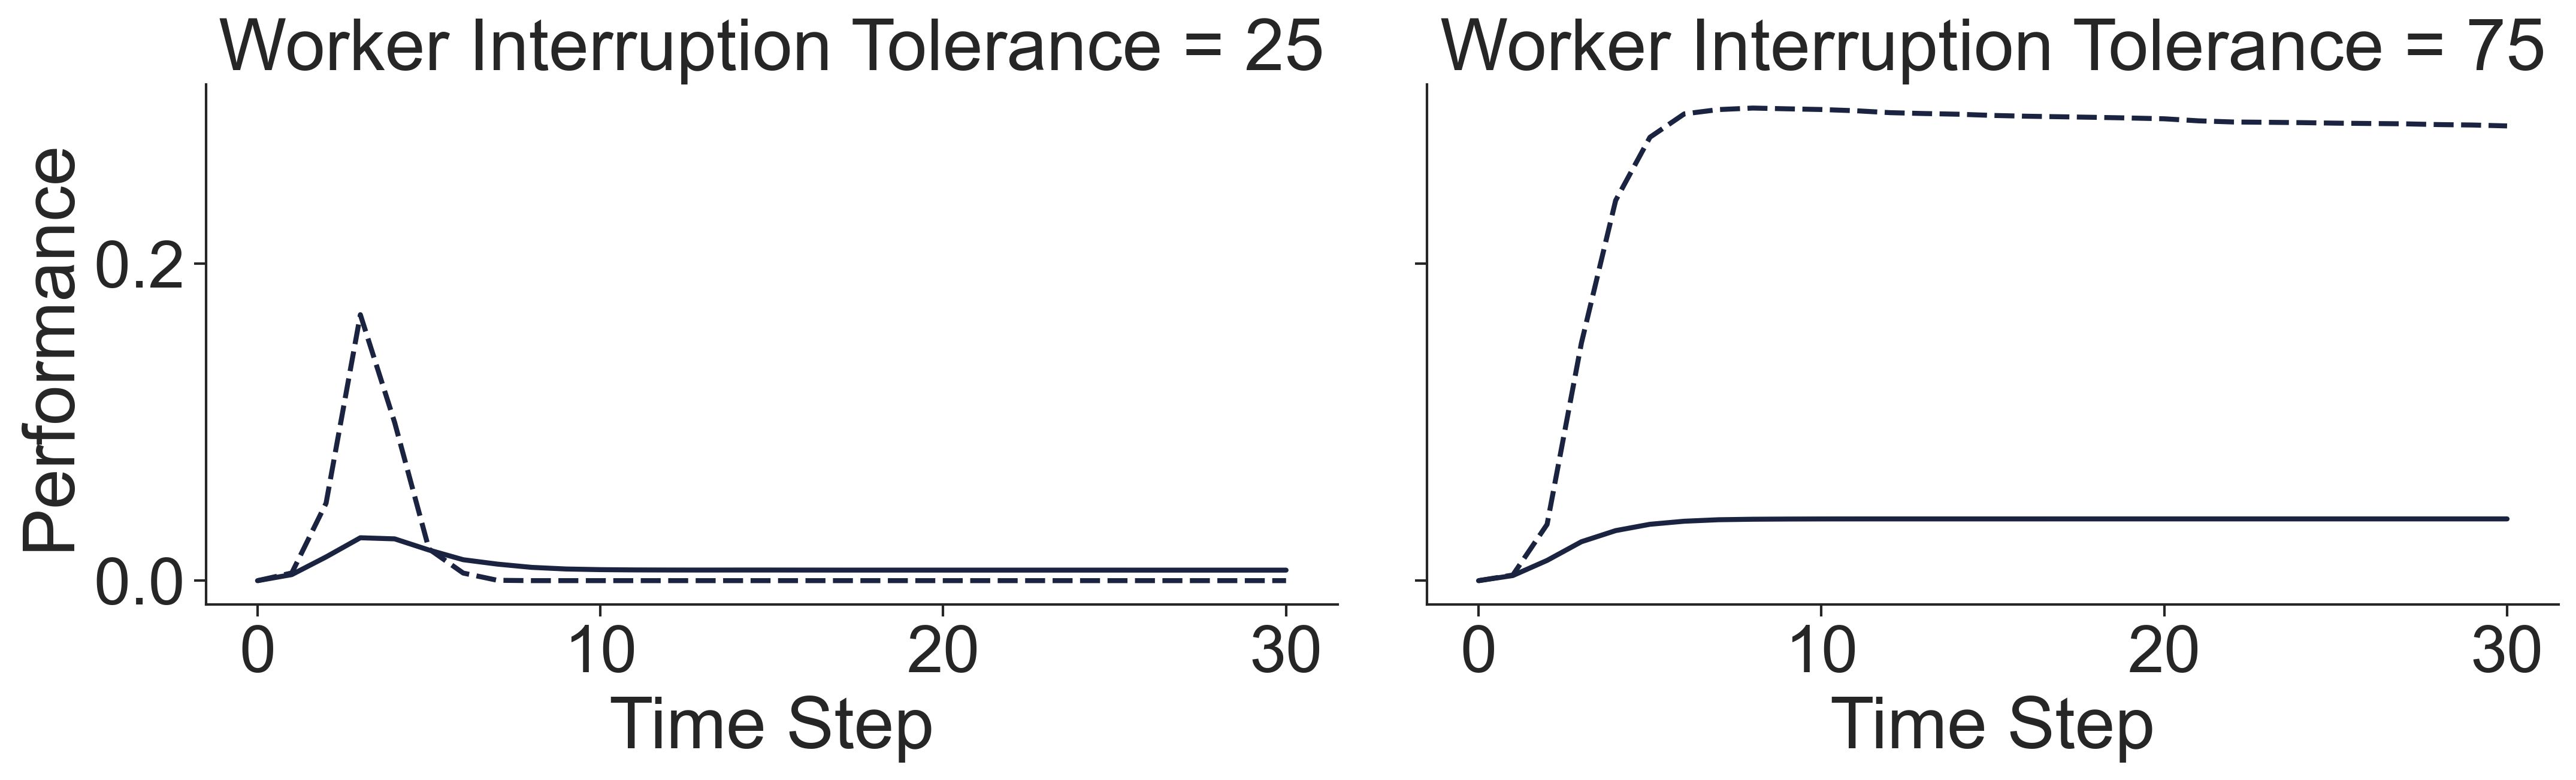

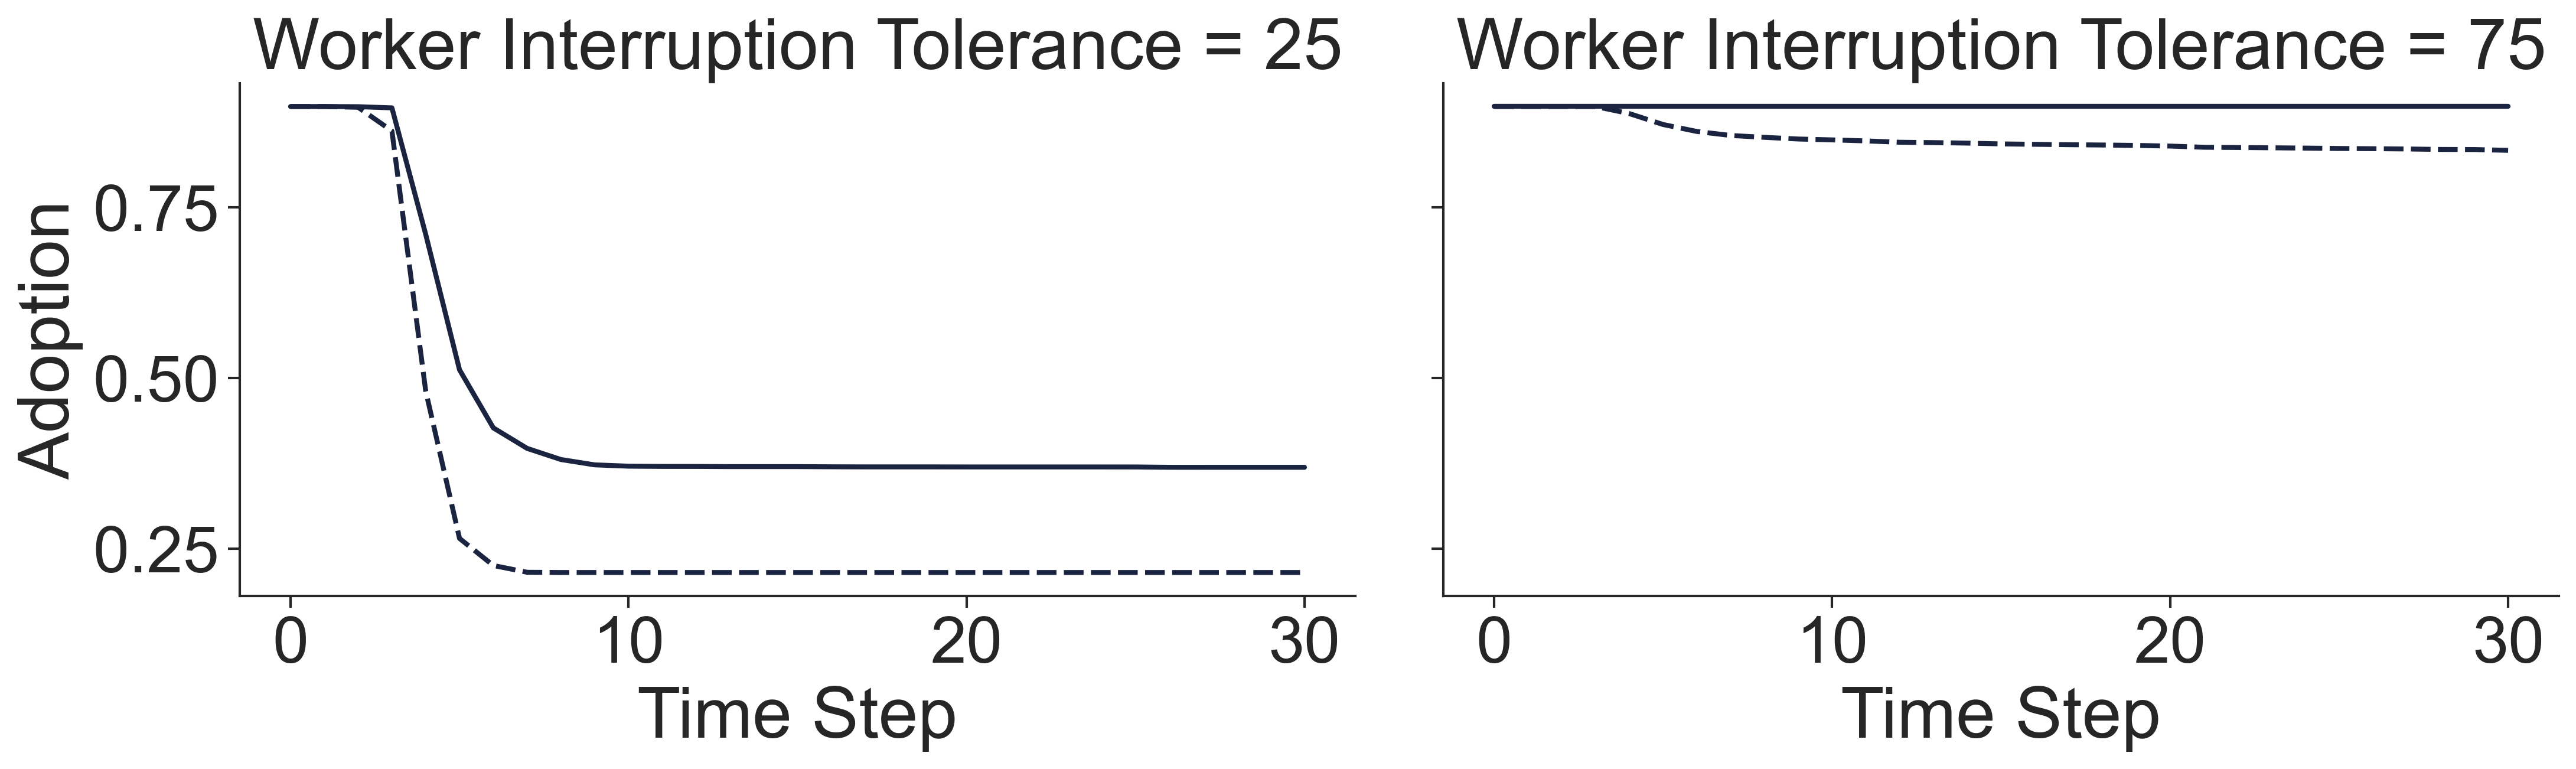

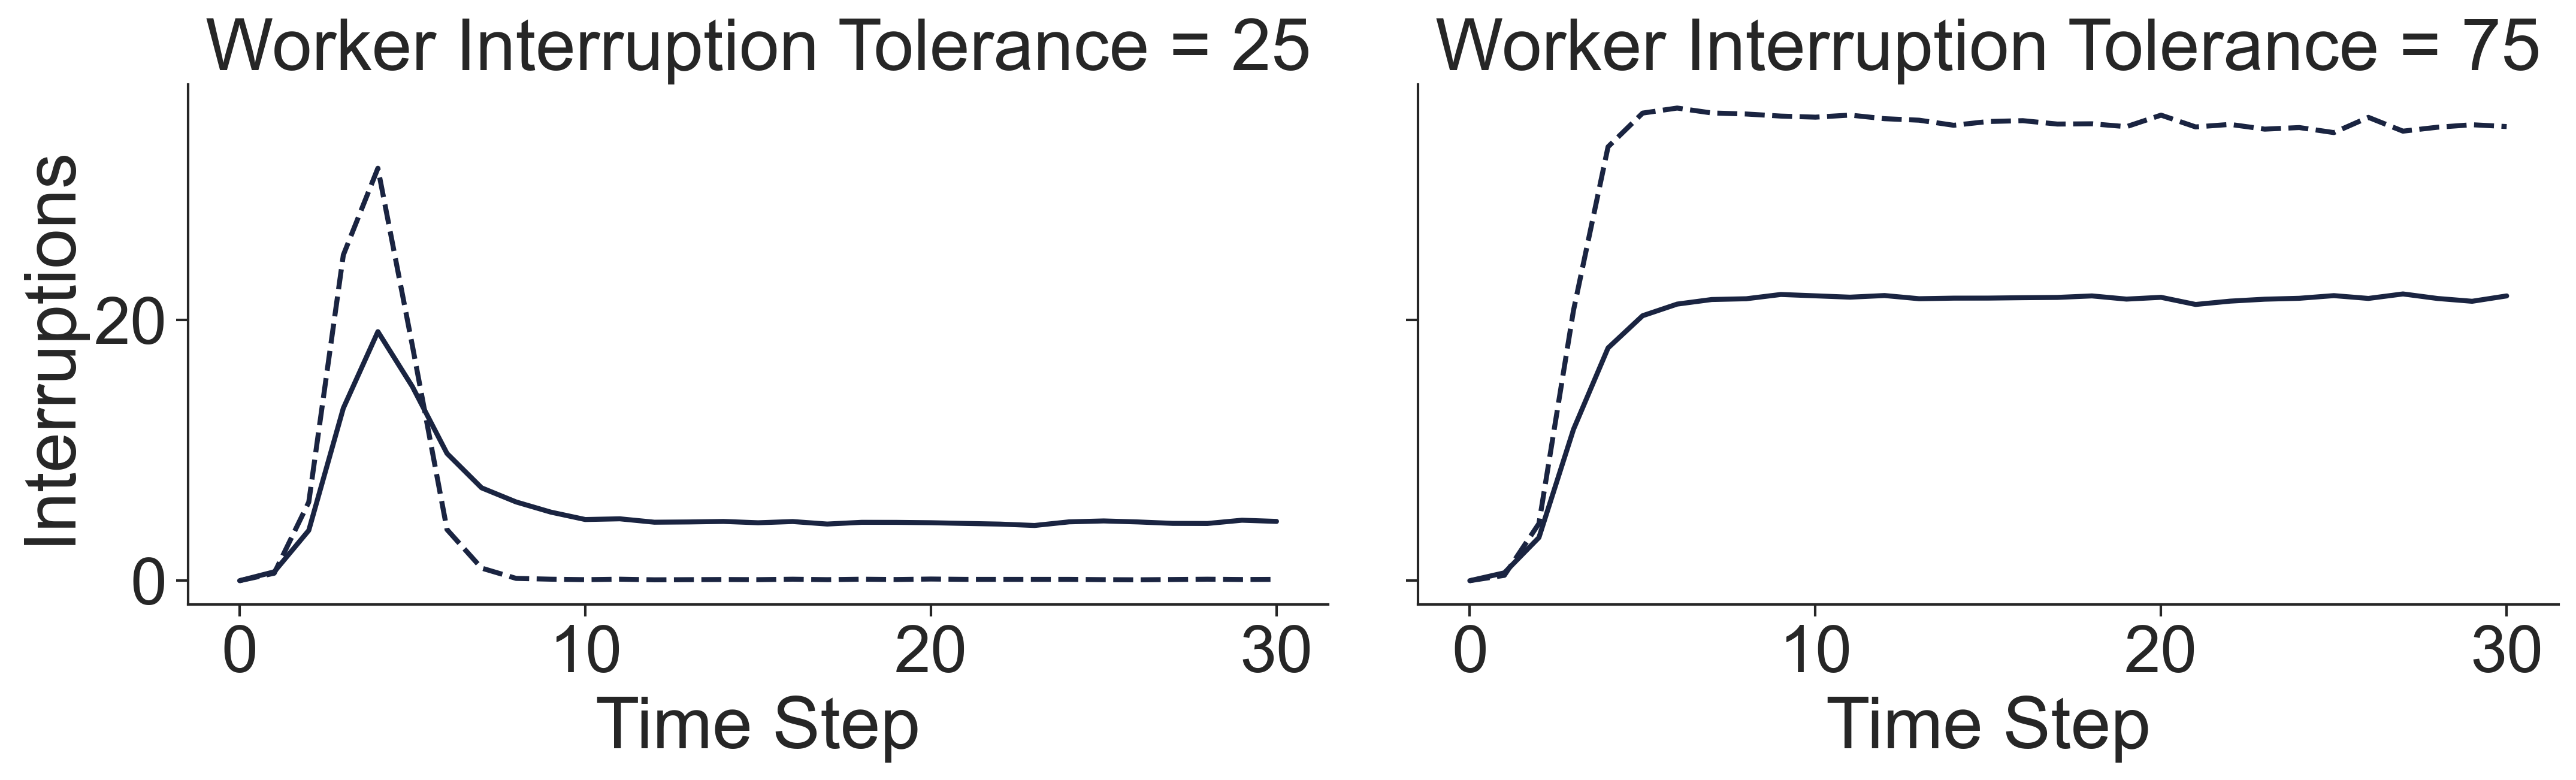

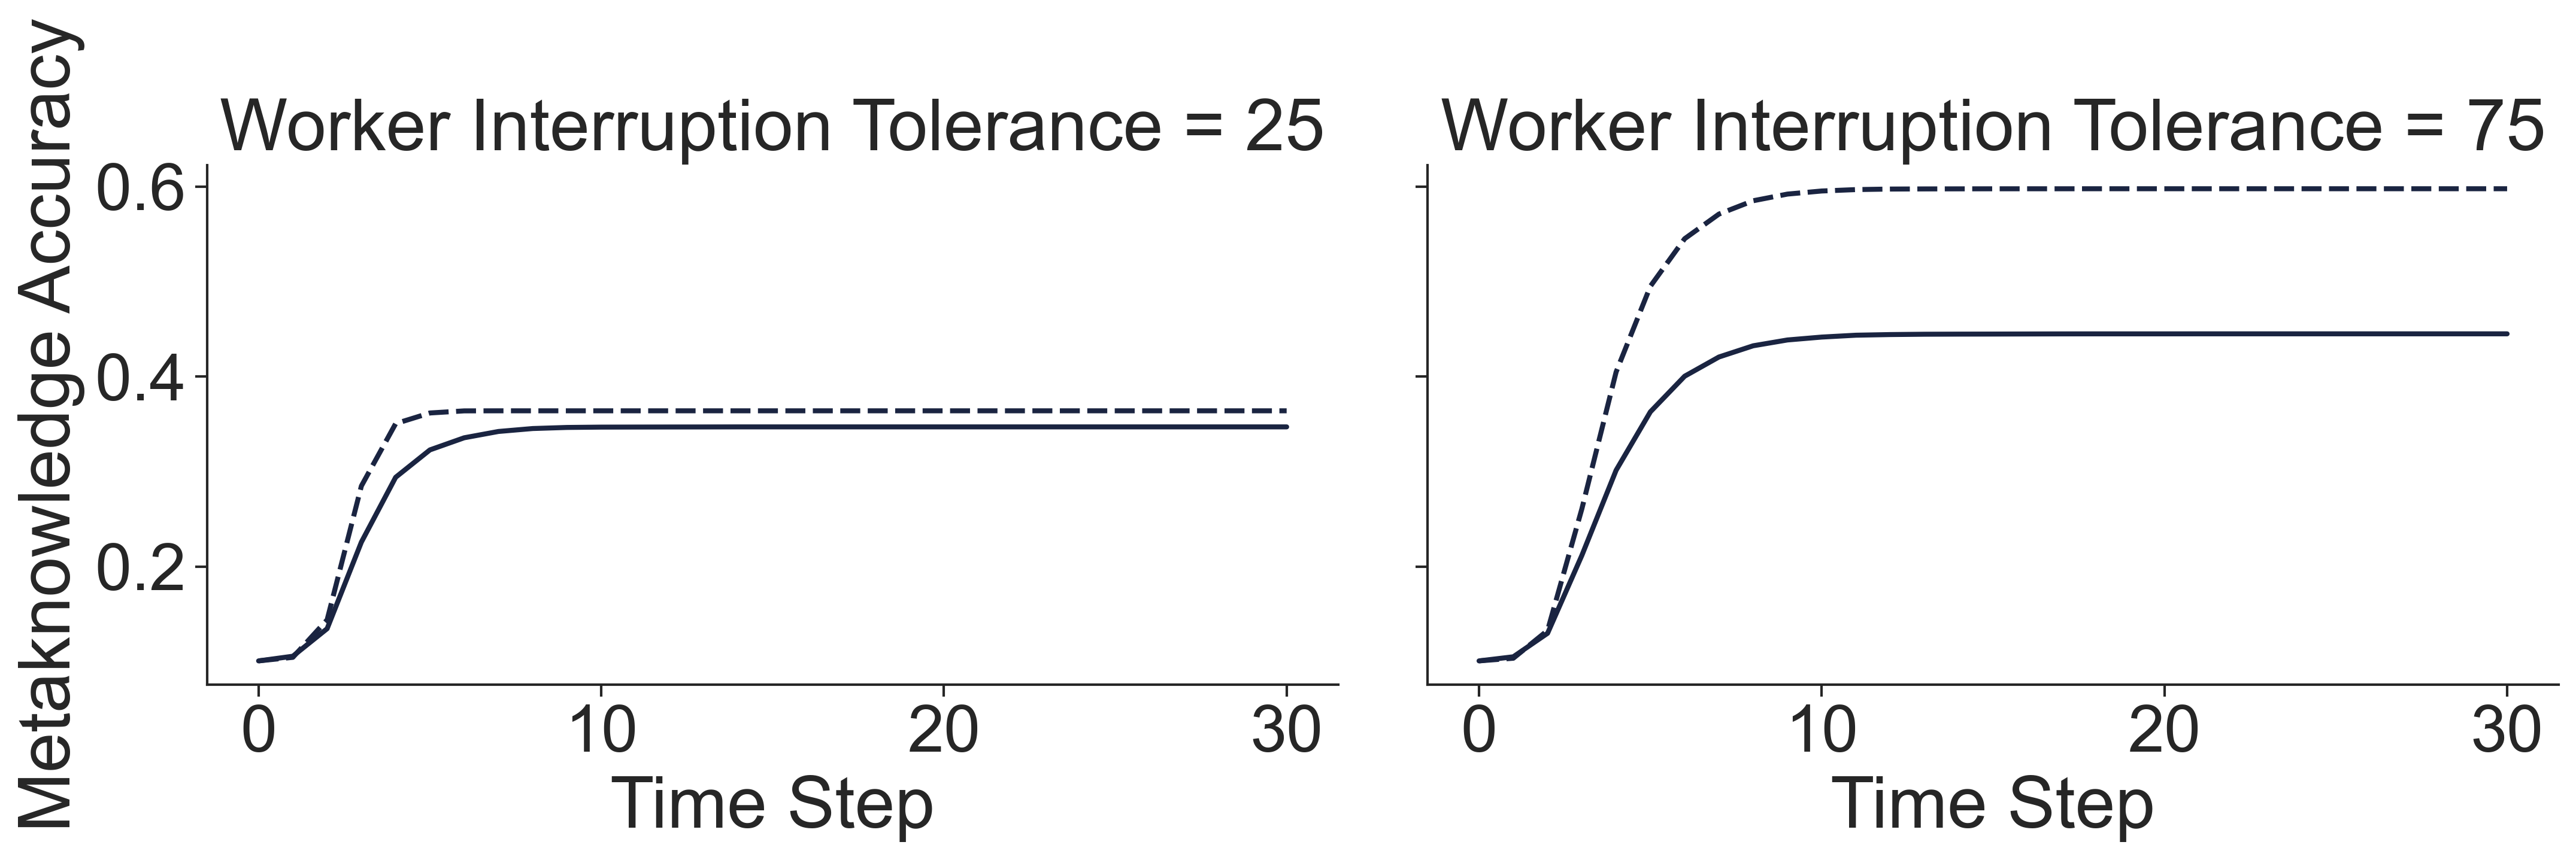

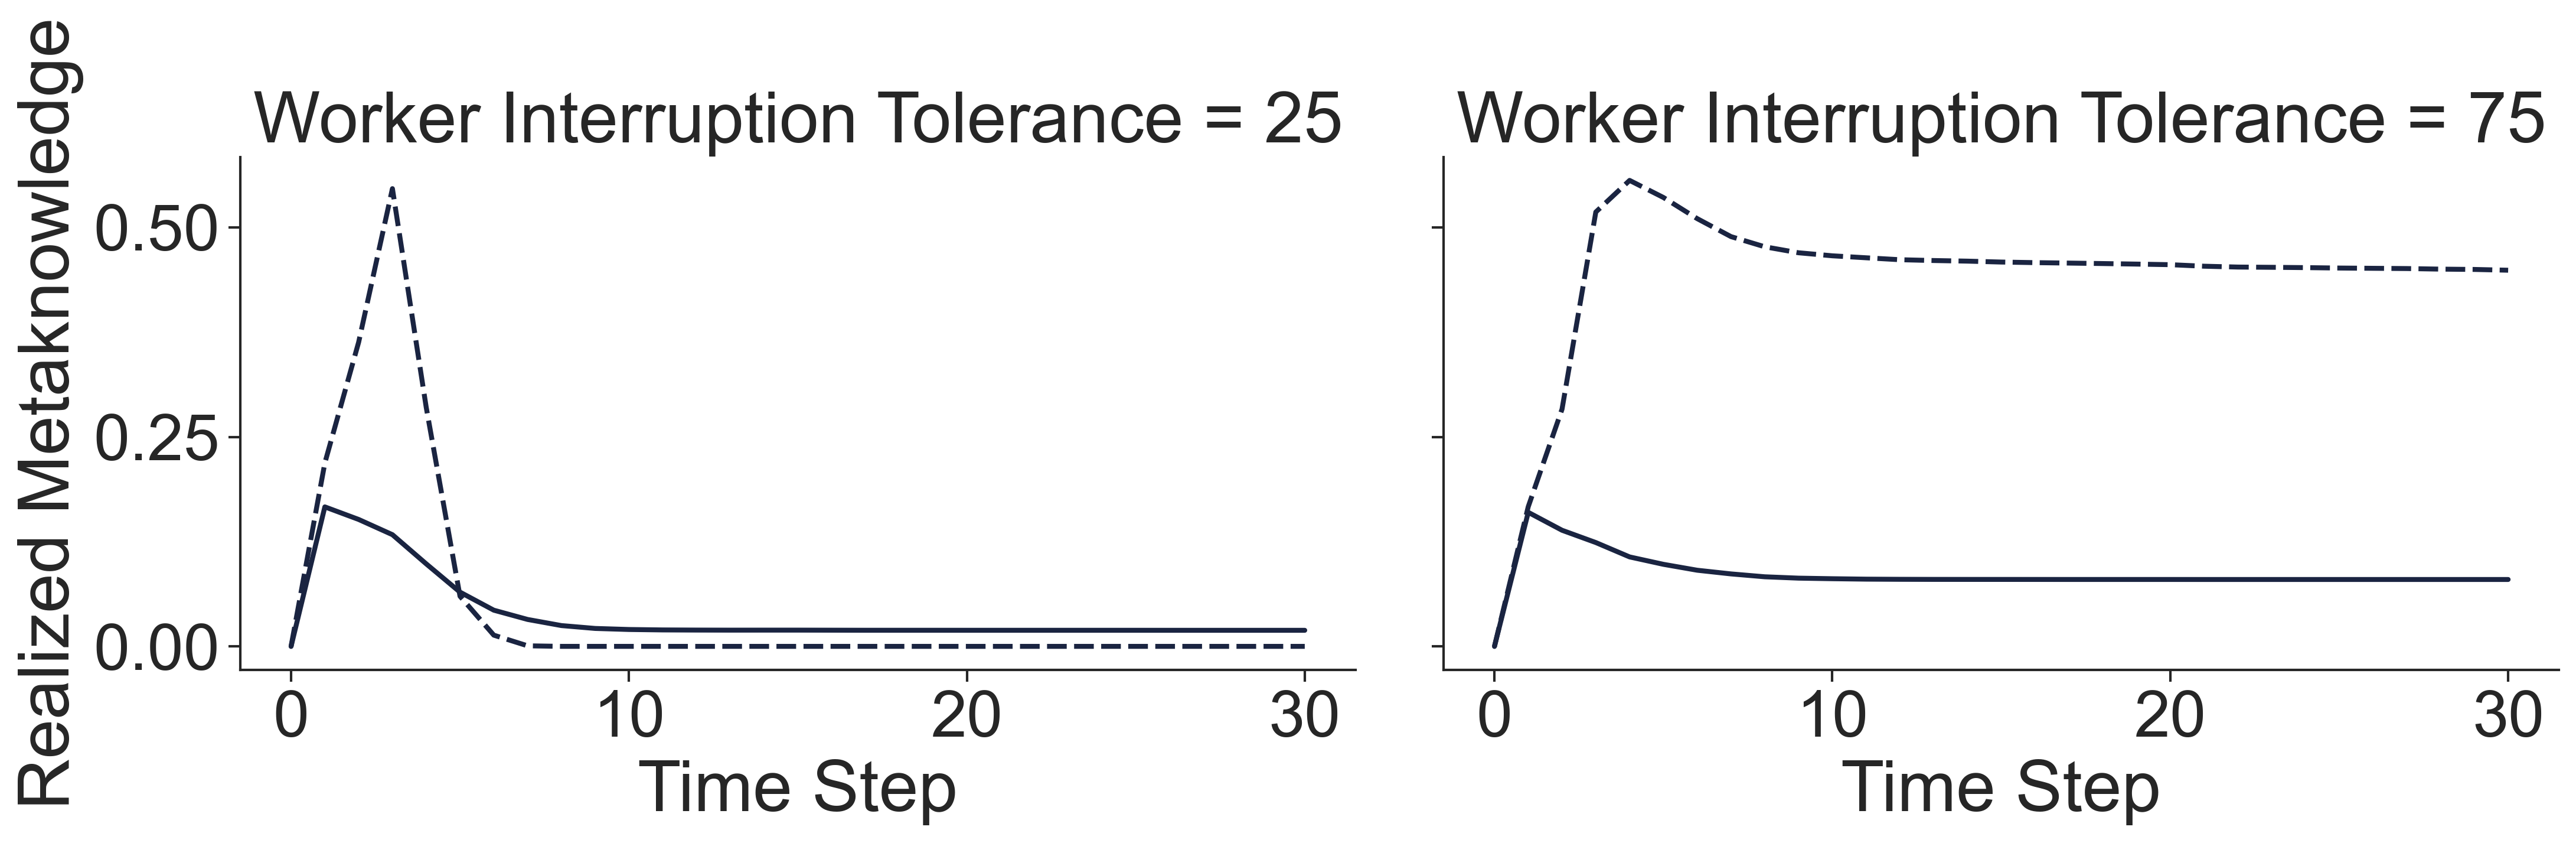

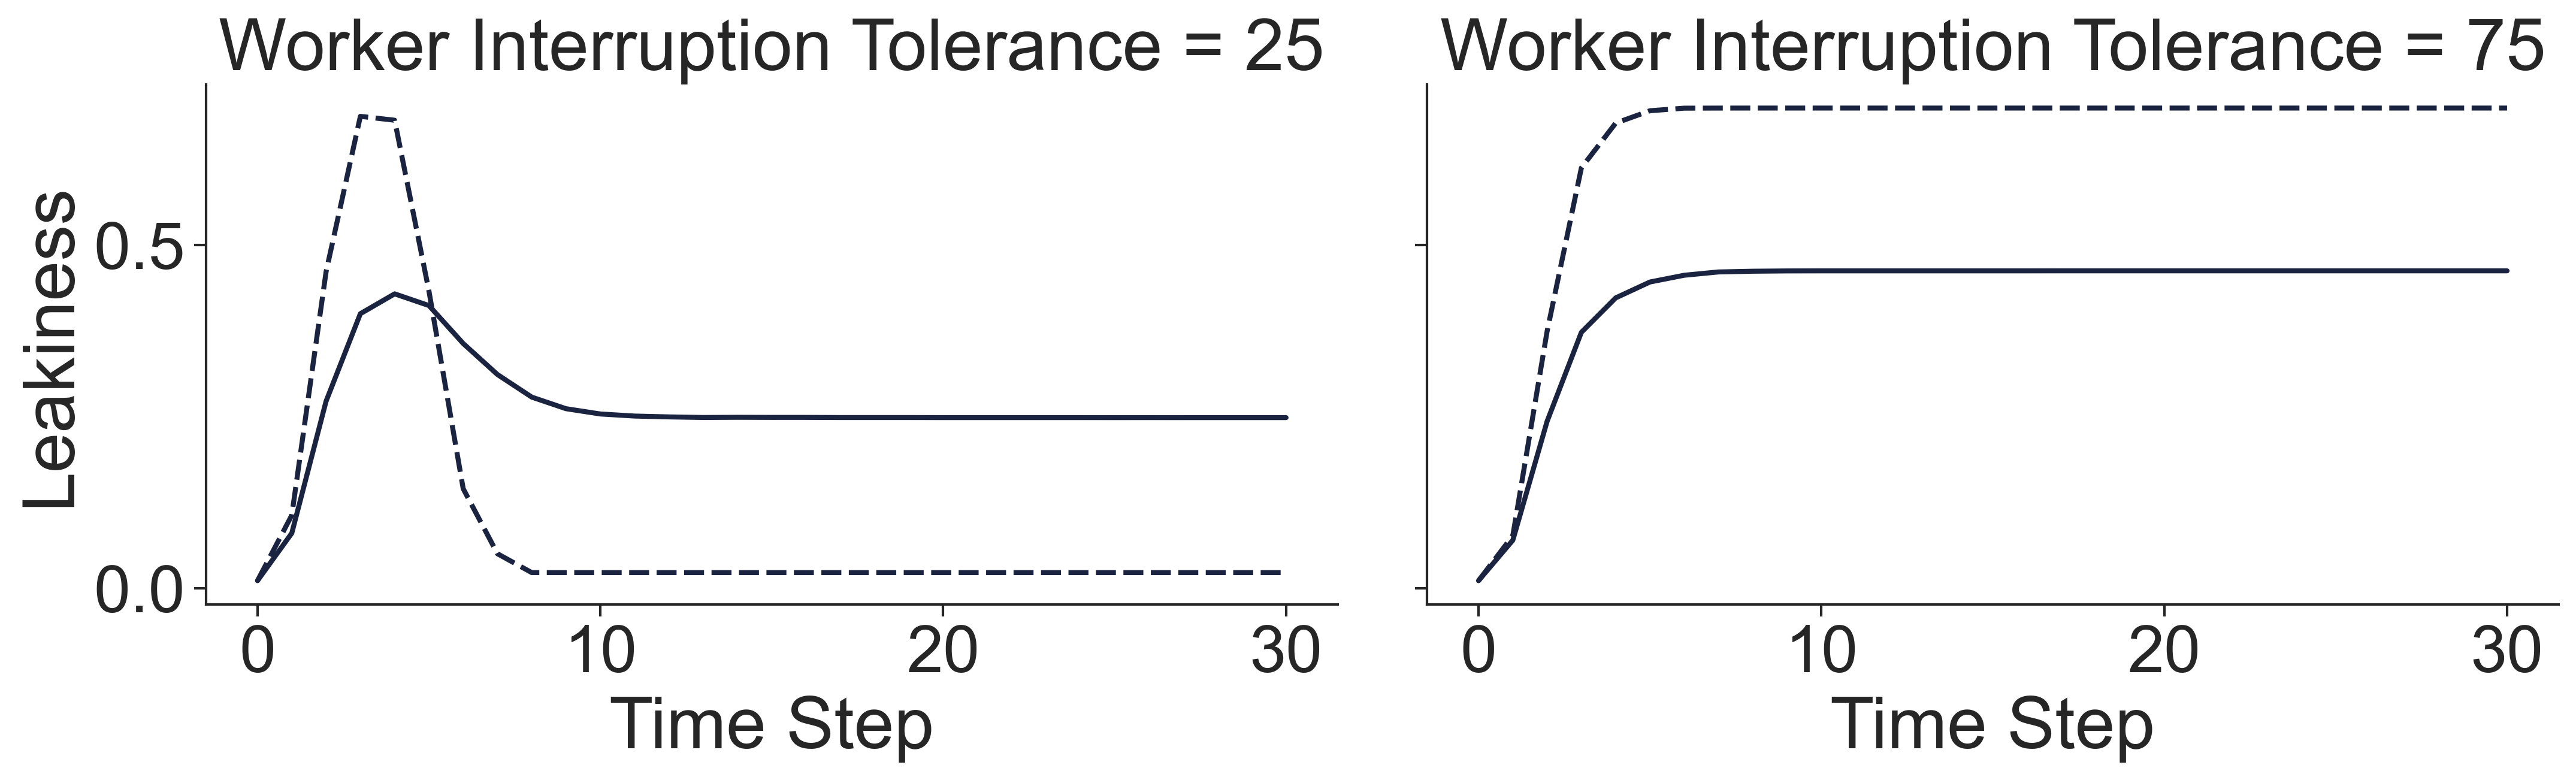

In [7]:
plot_his(data2,  legend=False)

### robustness taking in account only one configuration

(1240, 20)


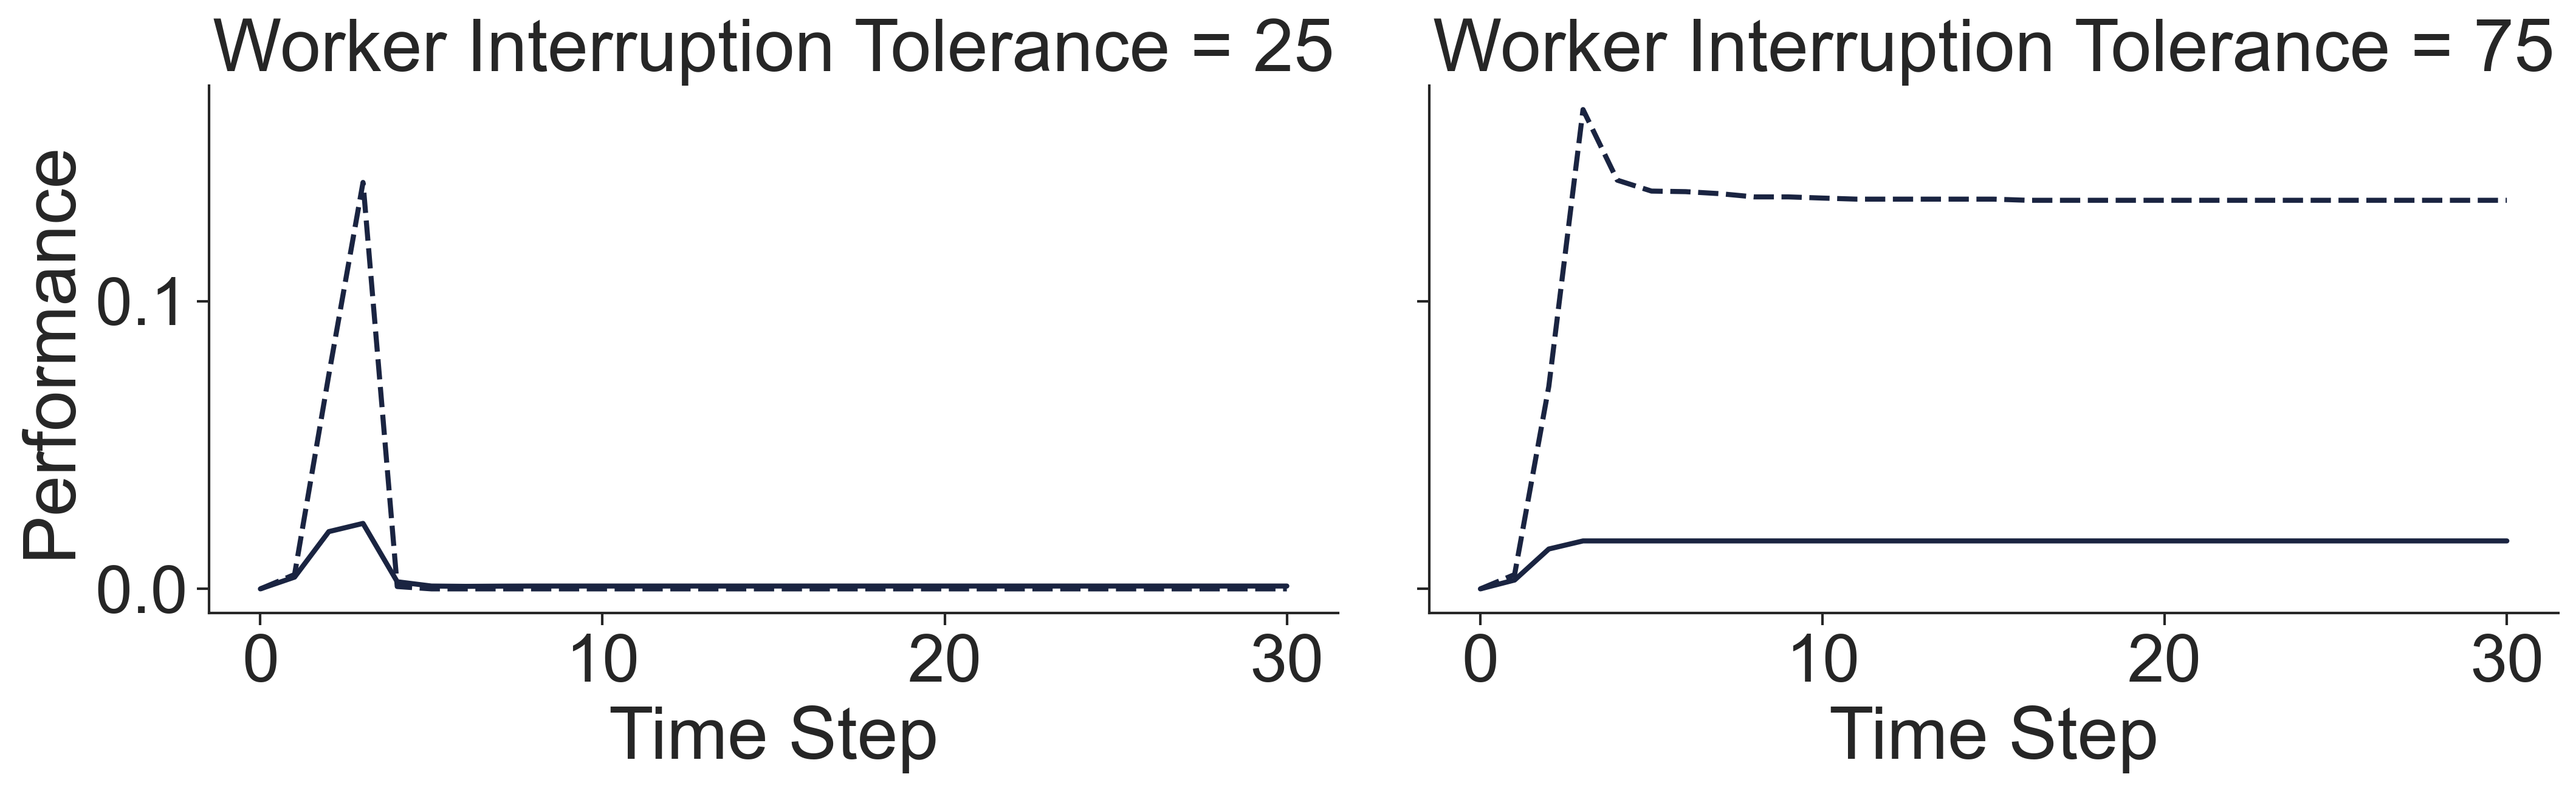

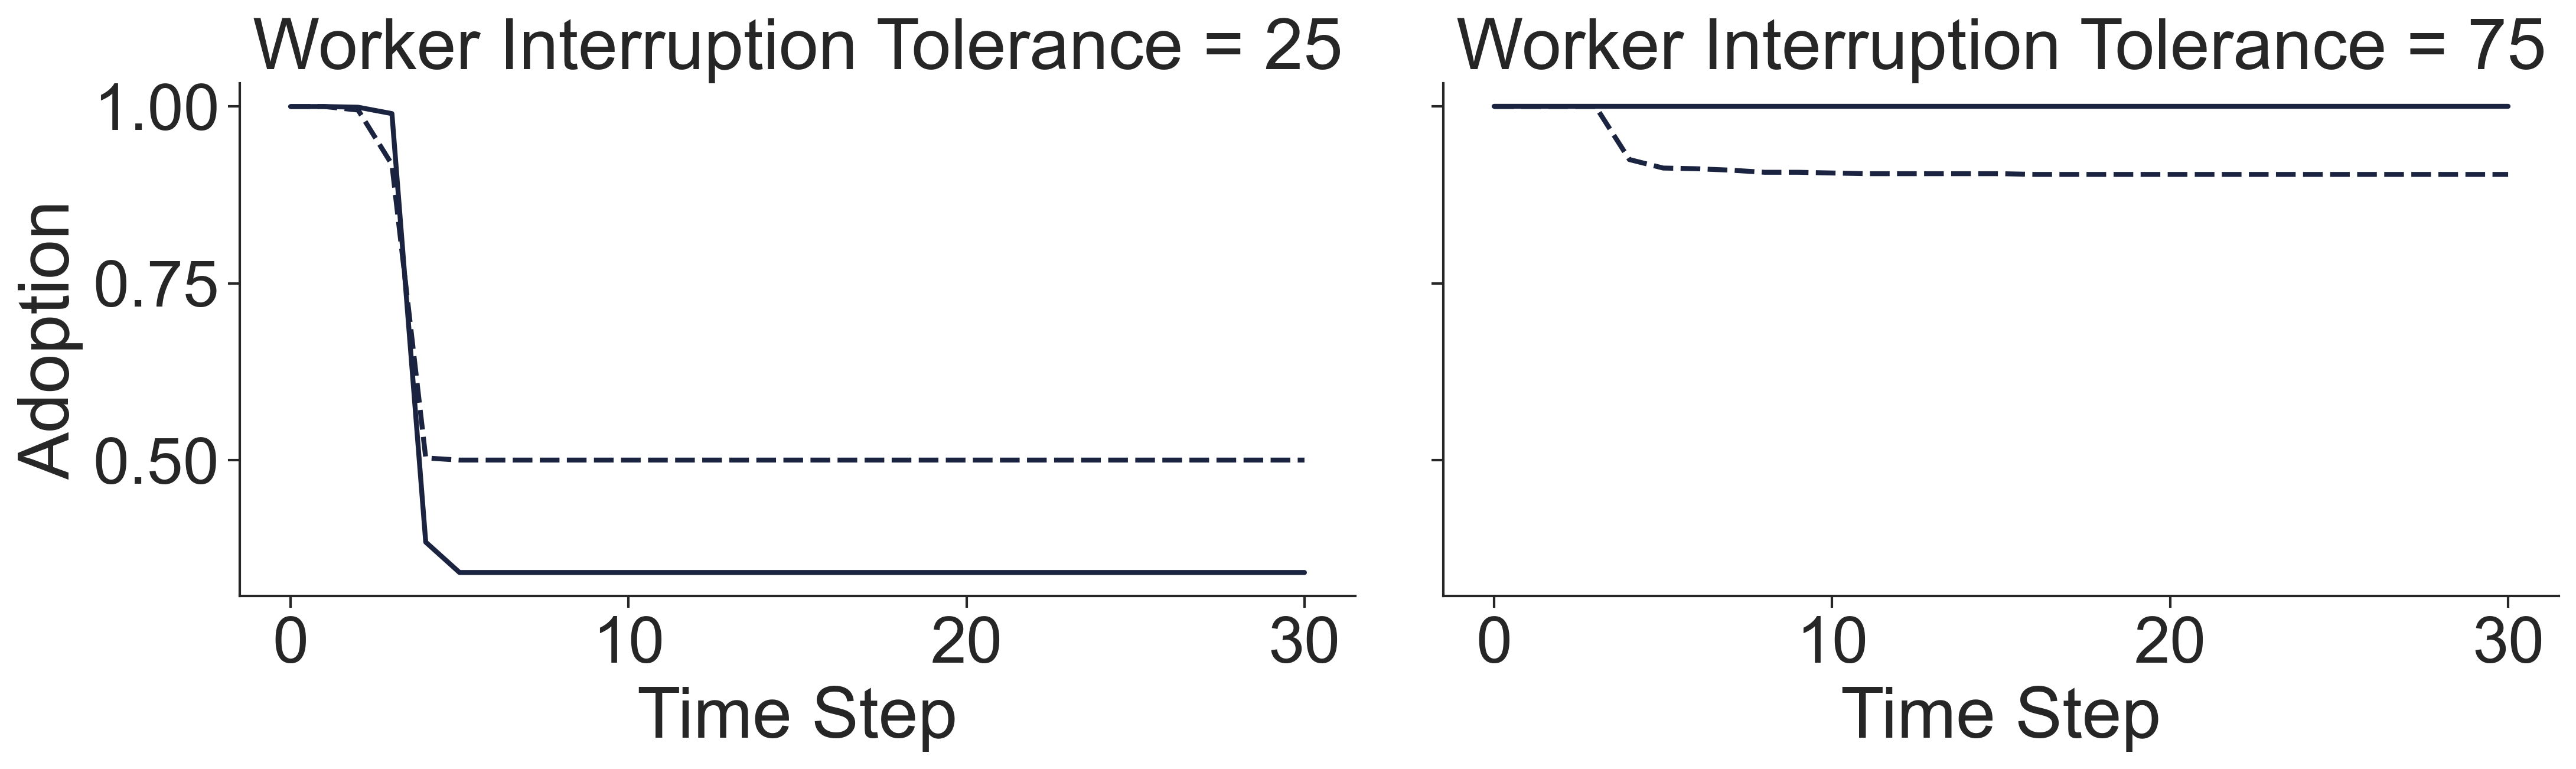

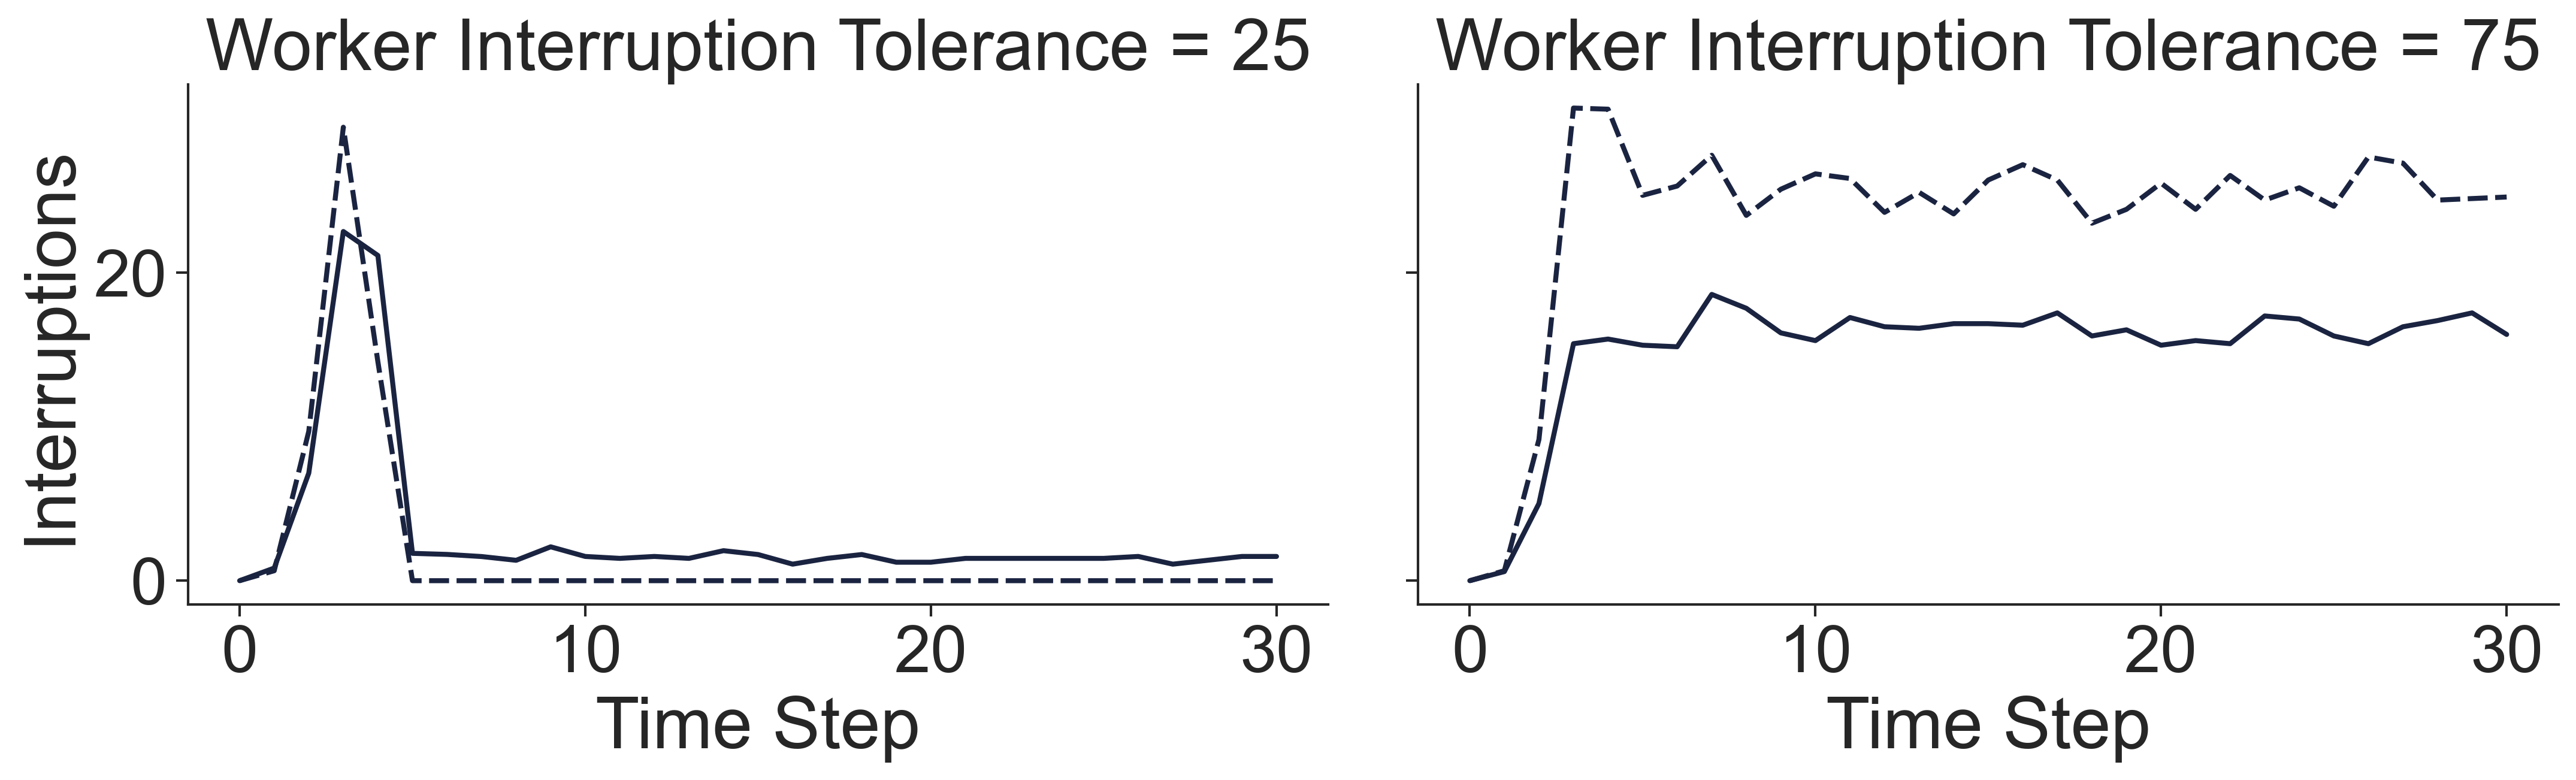

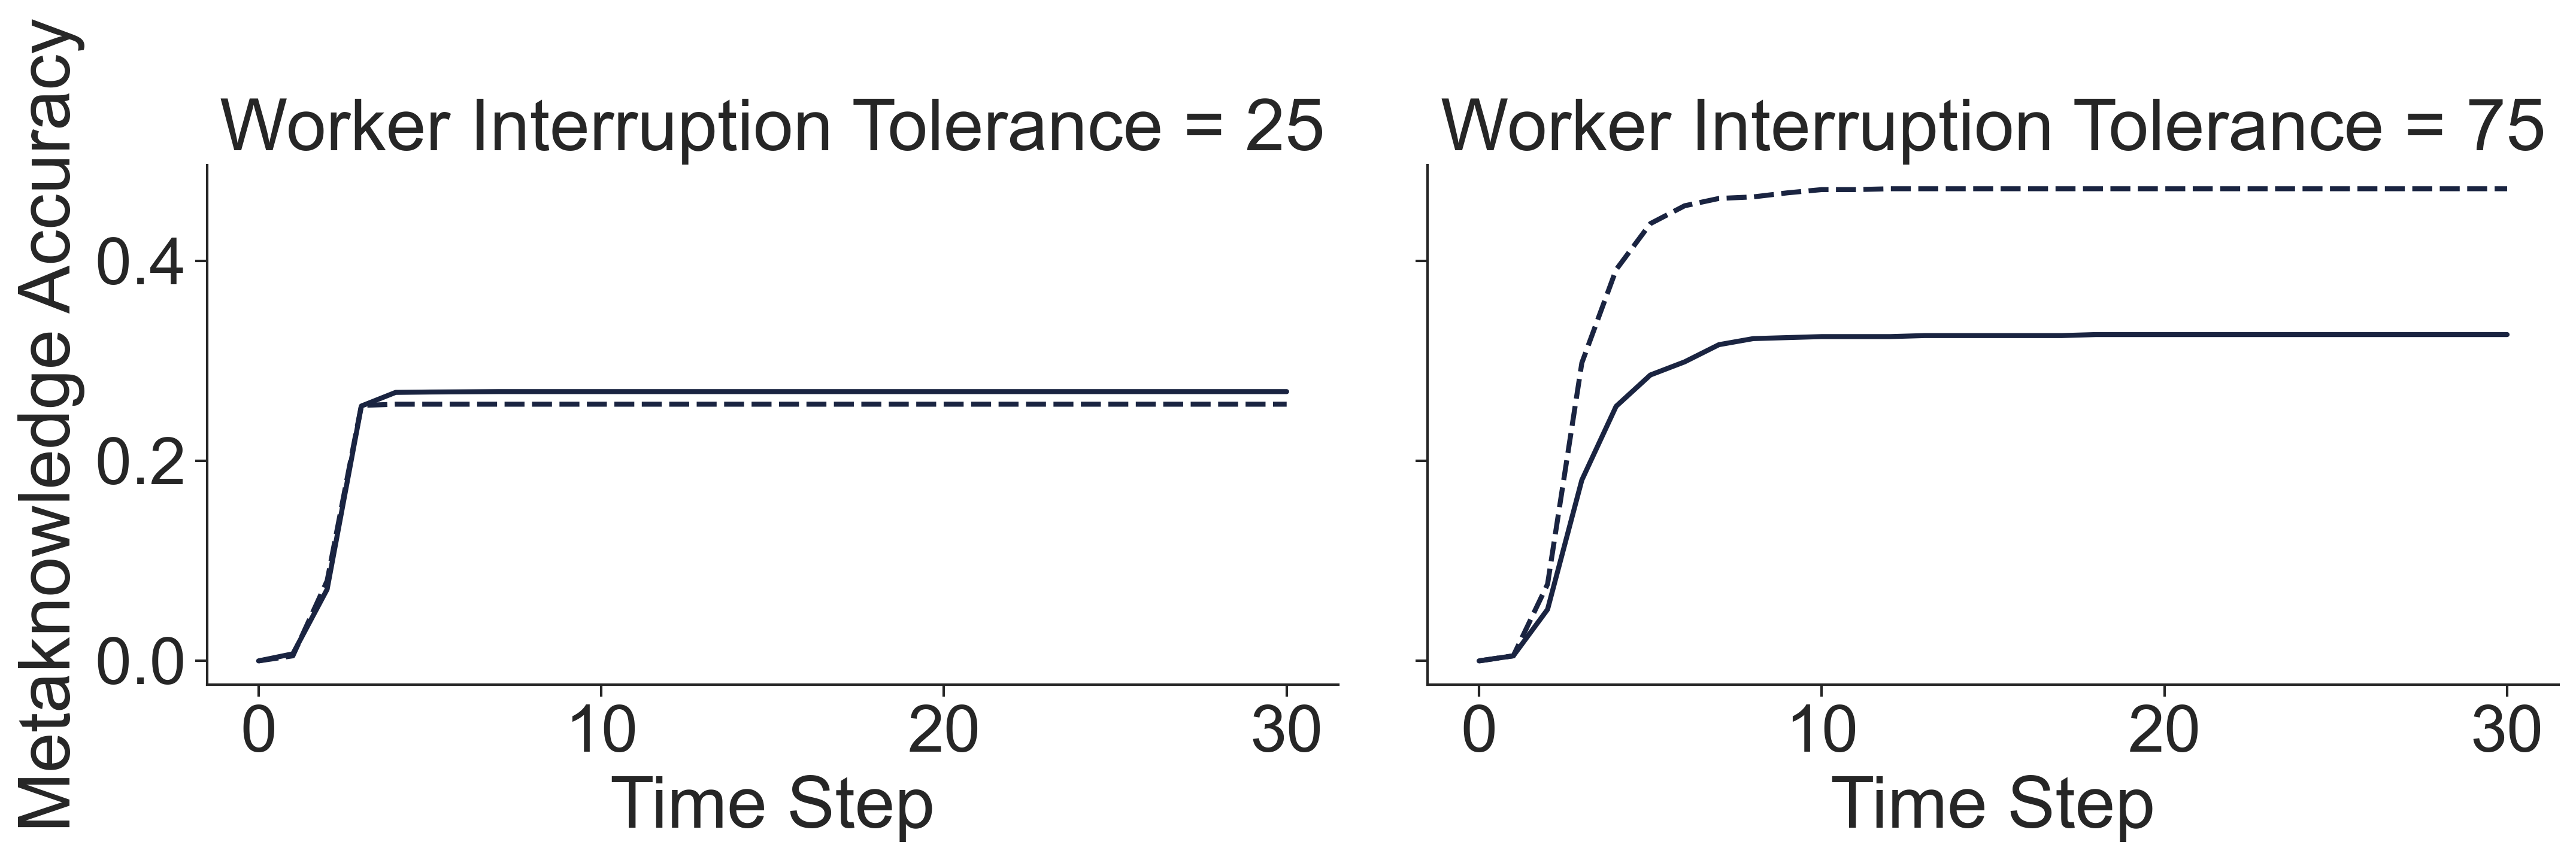

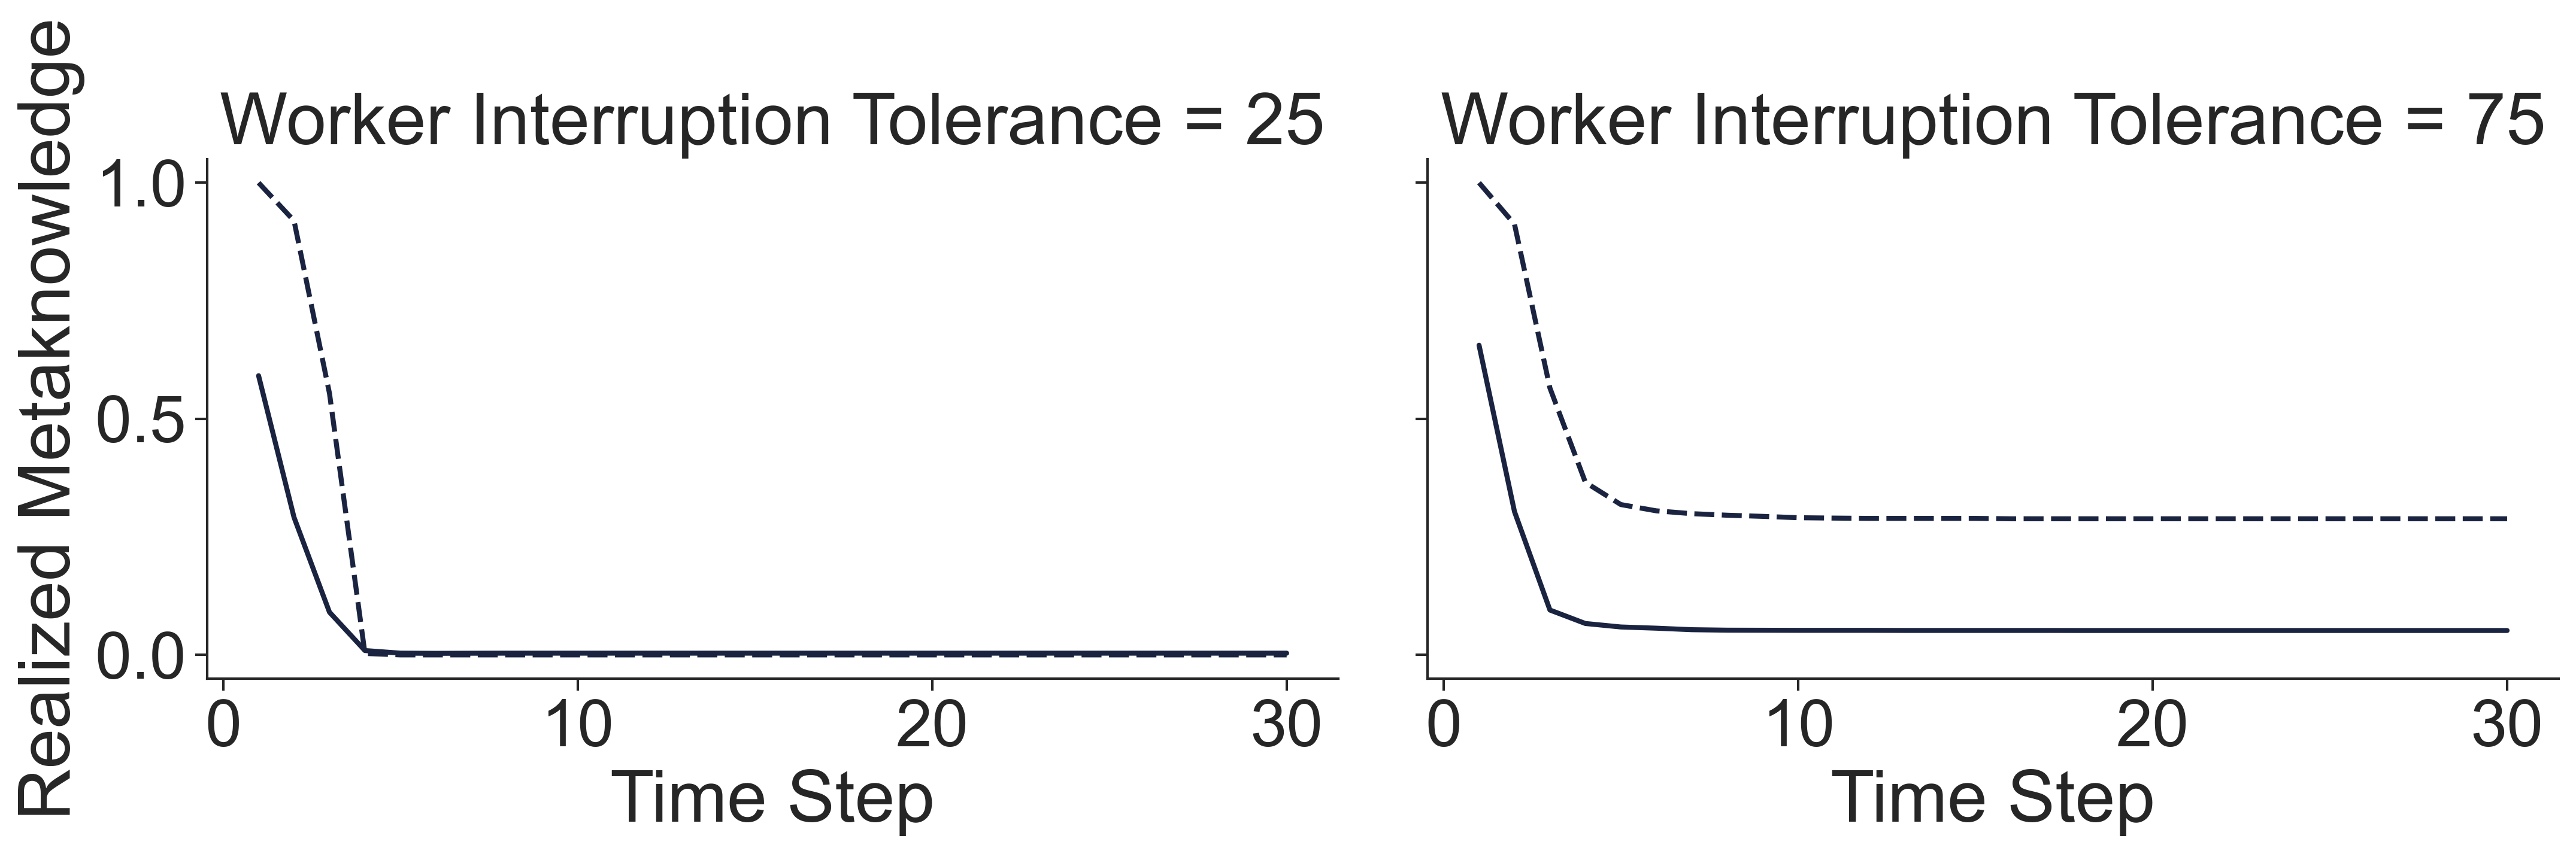

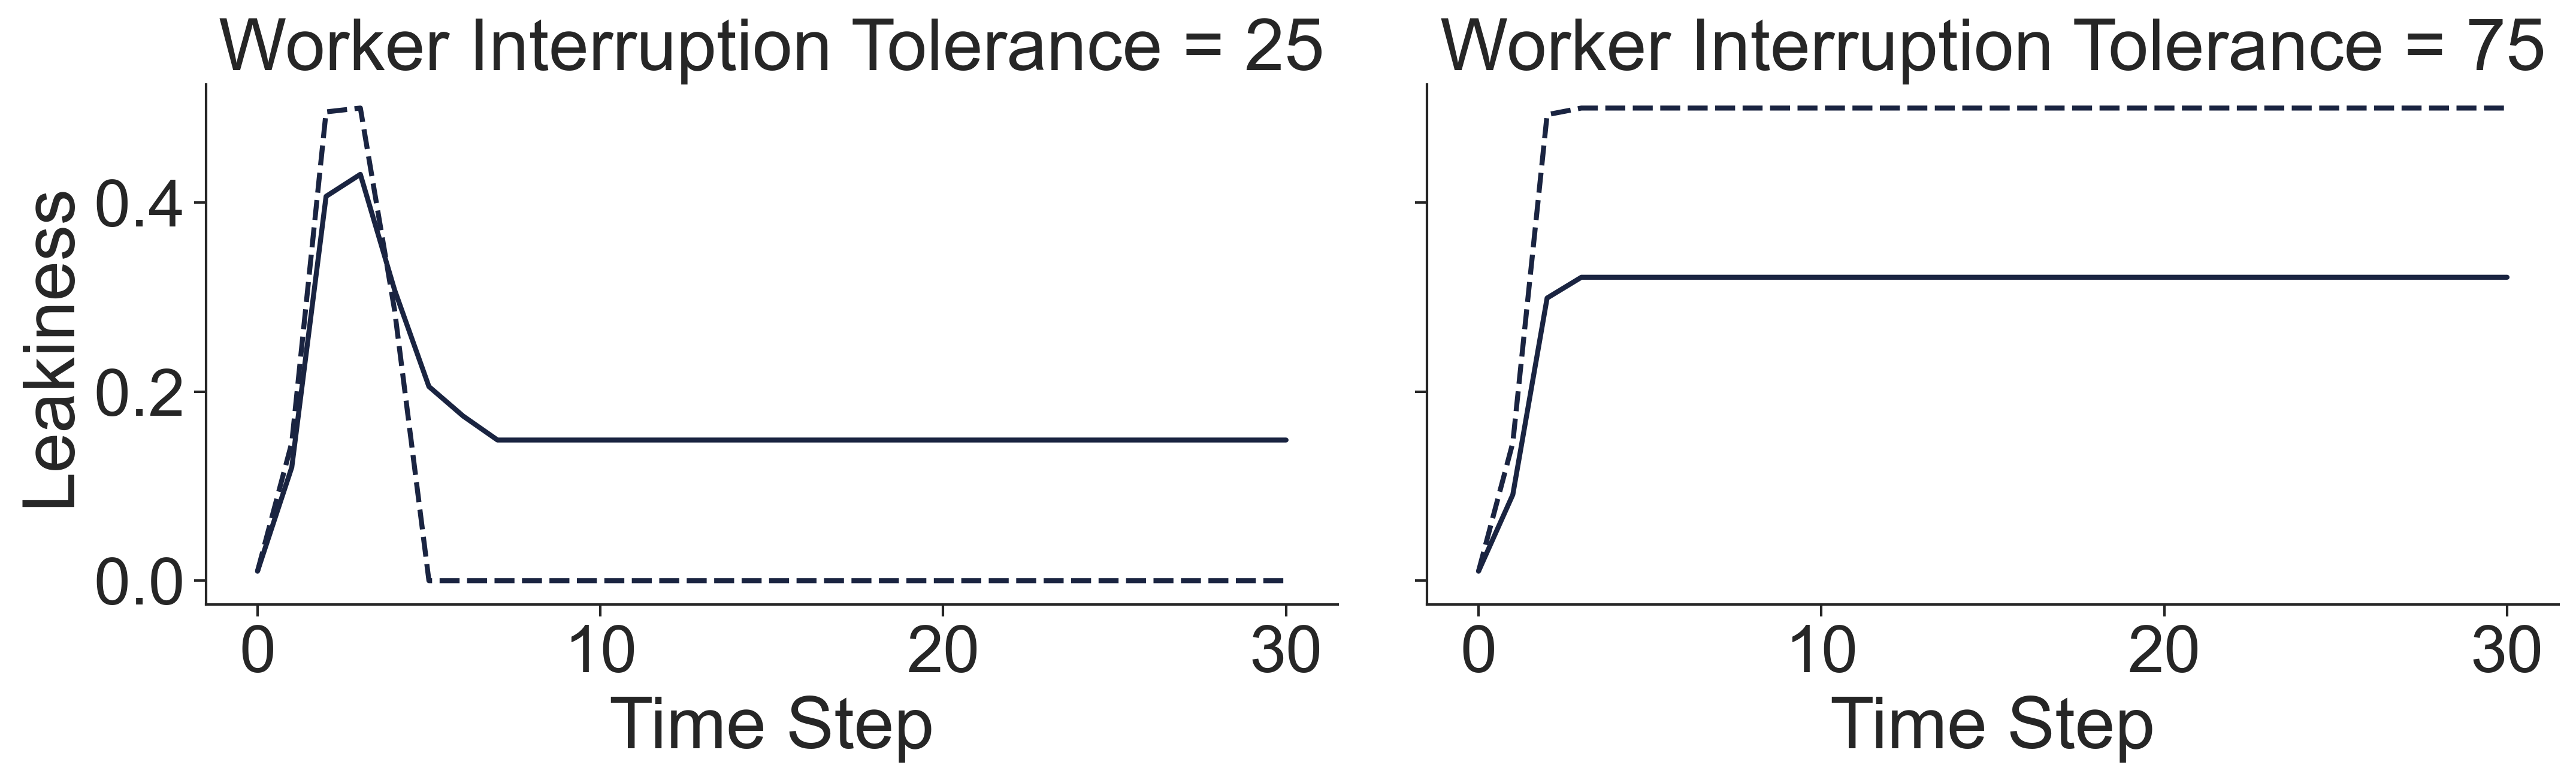

In [8]:
# data0 is the selected configuration
data0 = data2[(data2['Initial Metaknowledge Accuracy']==0.0) & (data2['Worker Dependency']==0.3) & (data2['Initial Esm Adoption']==1.0) ]
print(data0.shape)
plot_his(data0, legend=False)

# not in the paper
## ESM Interactivity == 0.1

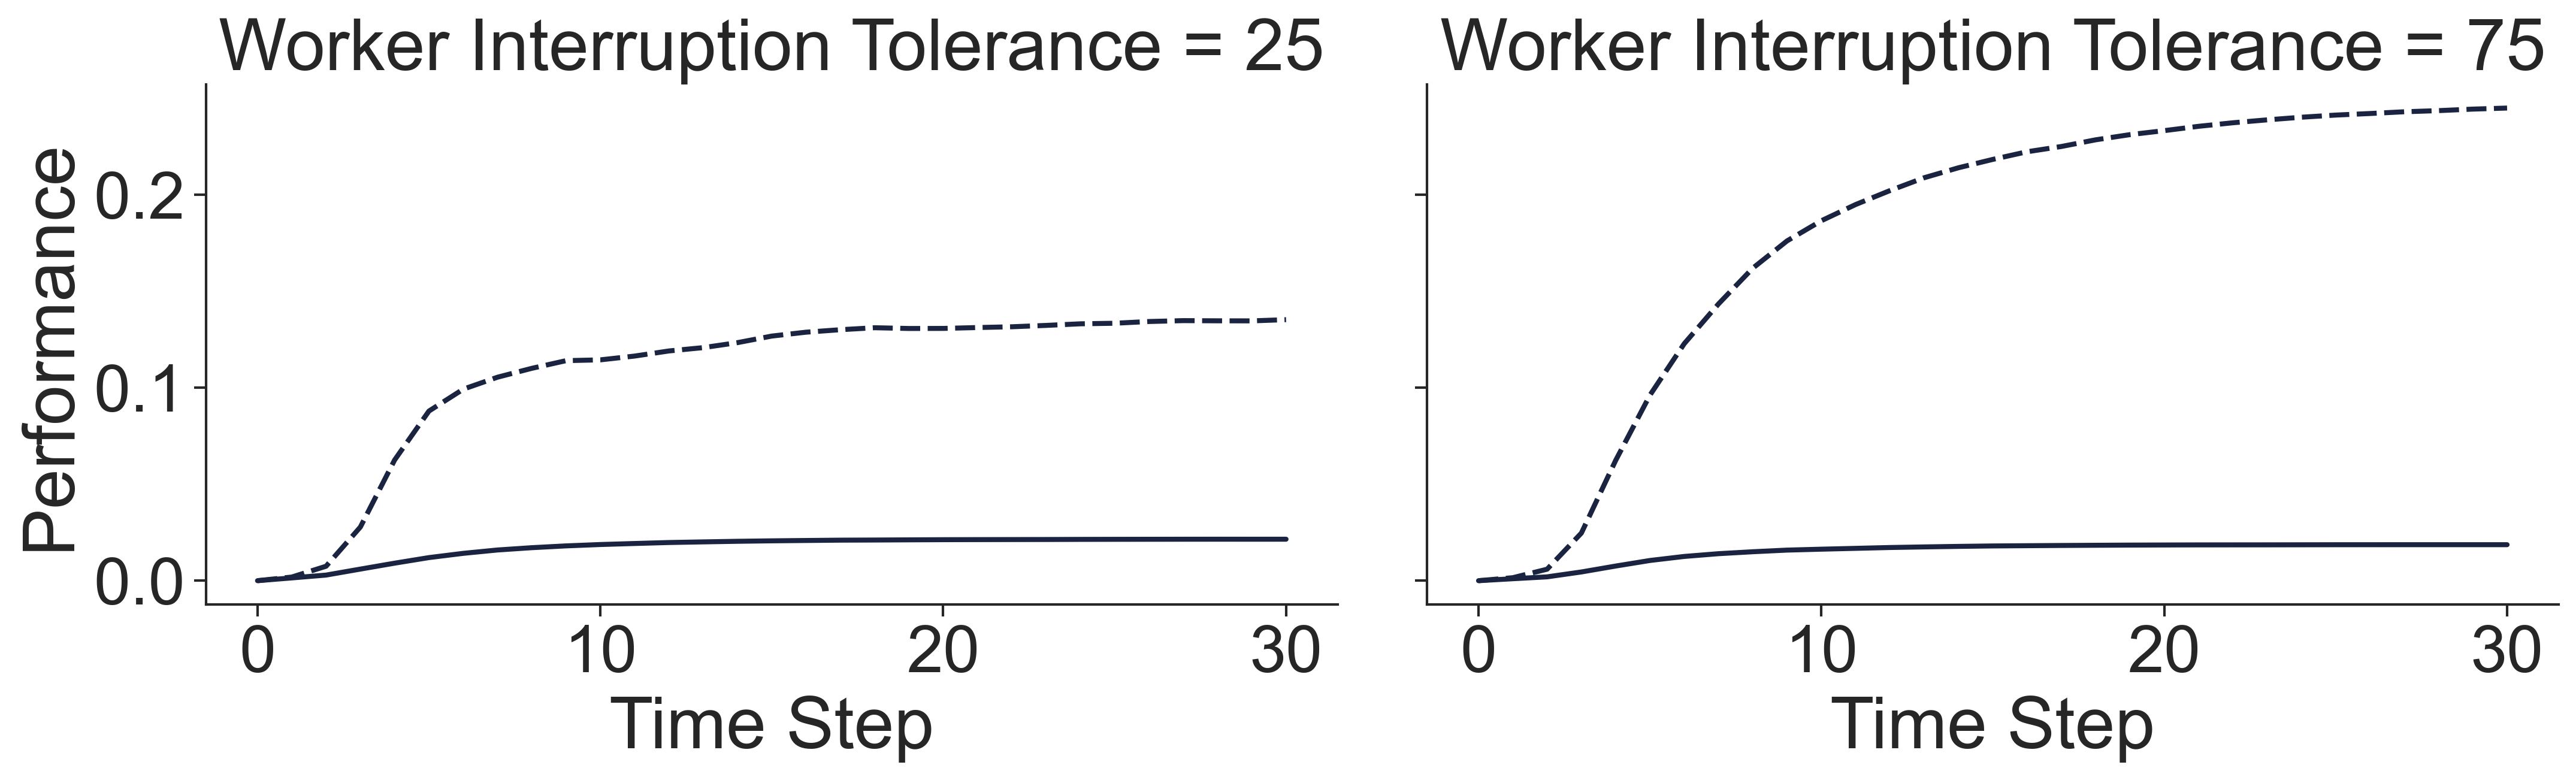

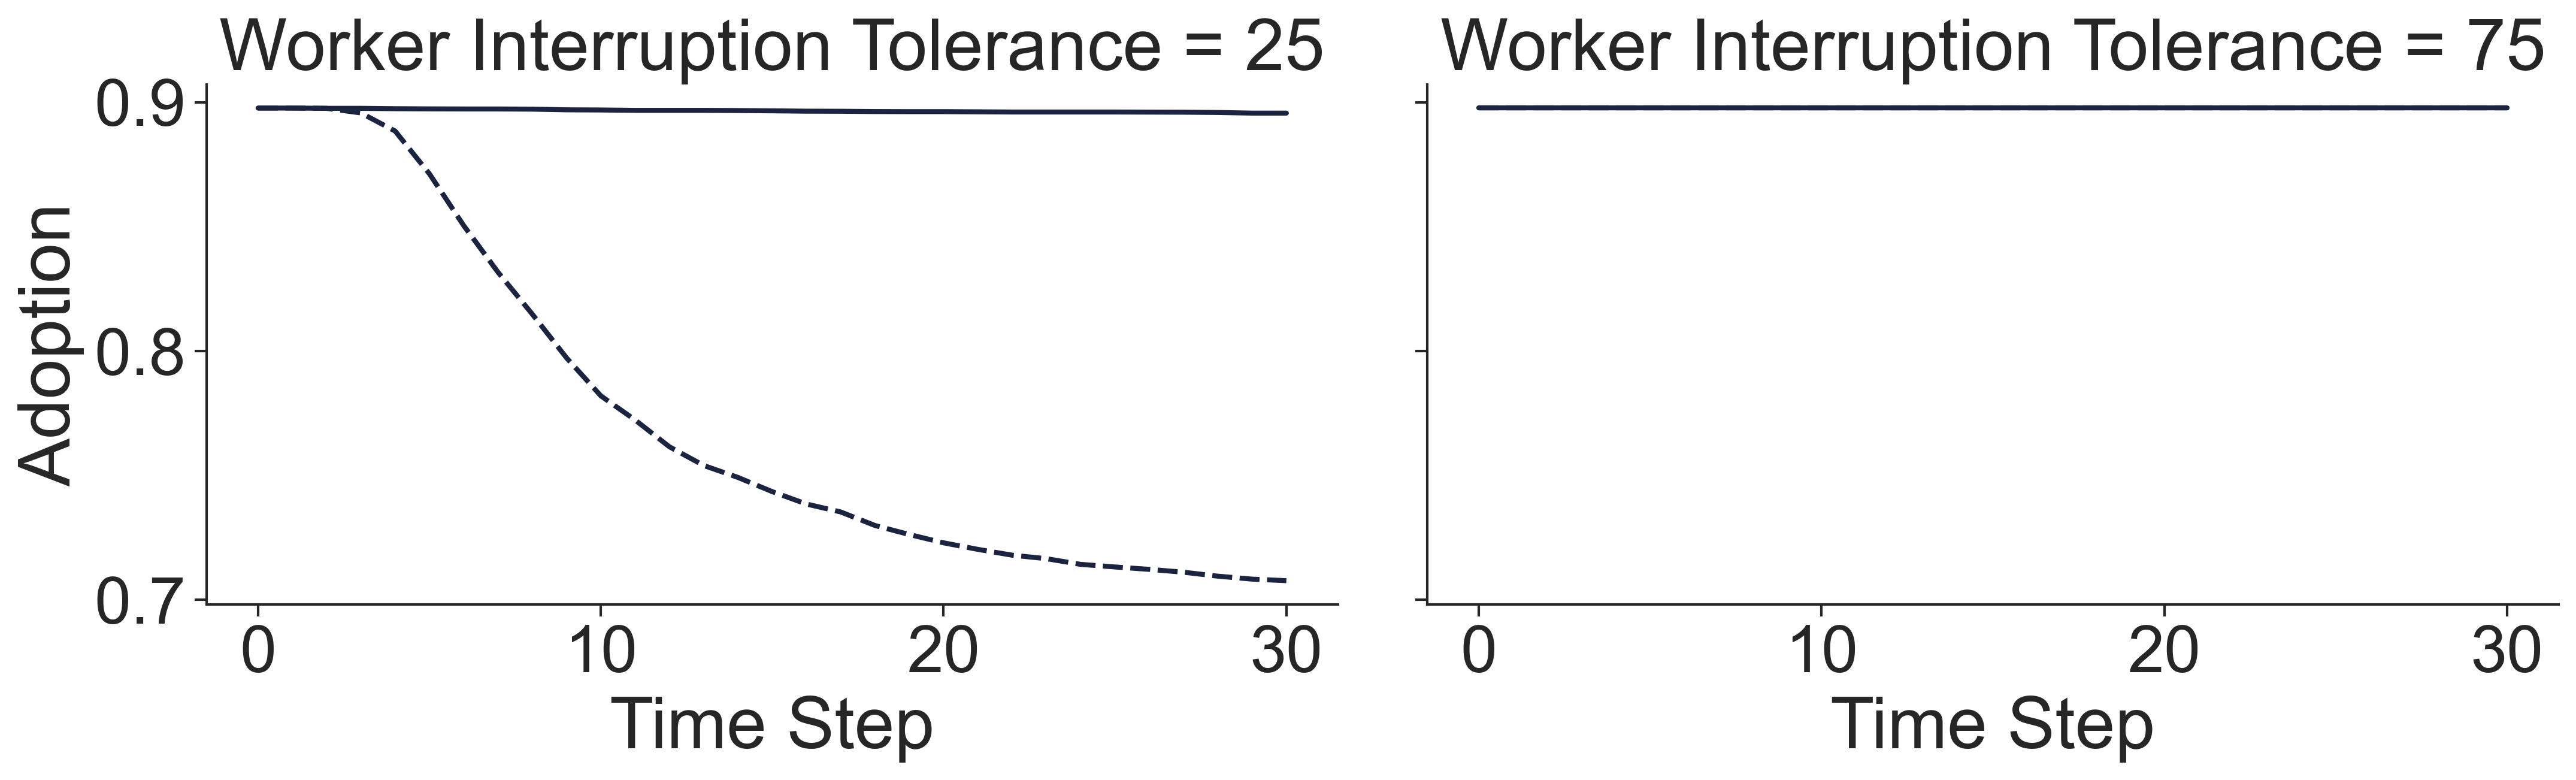

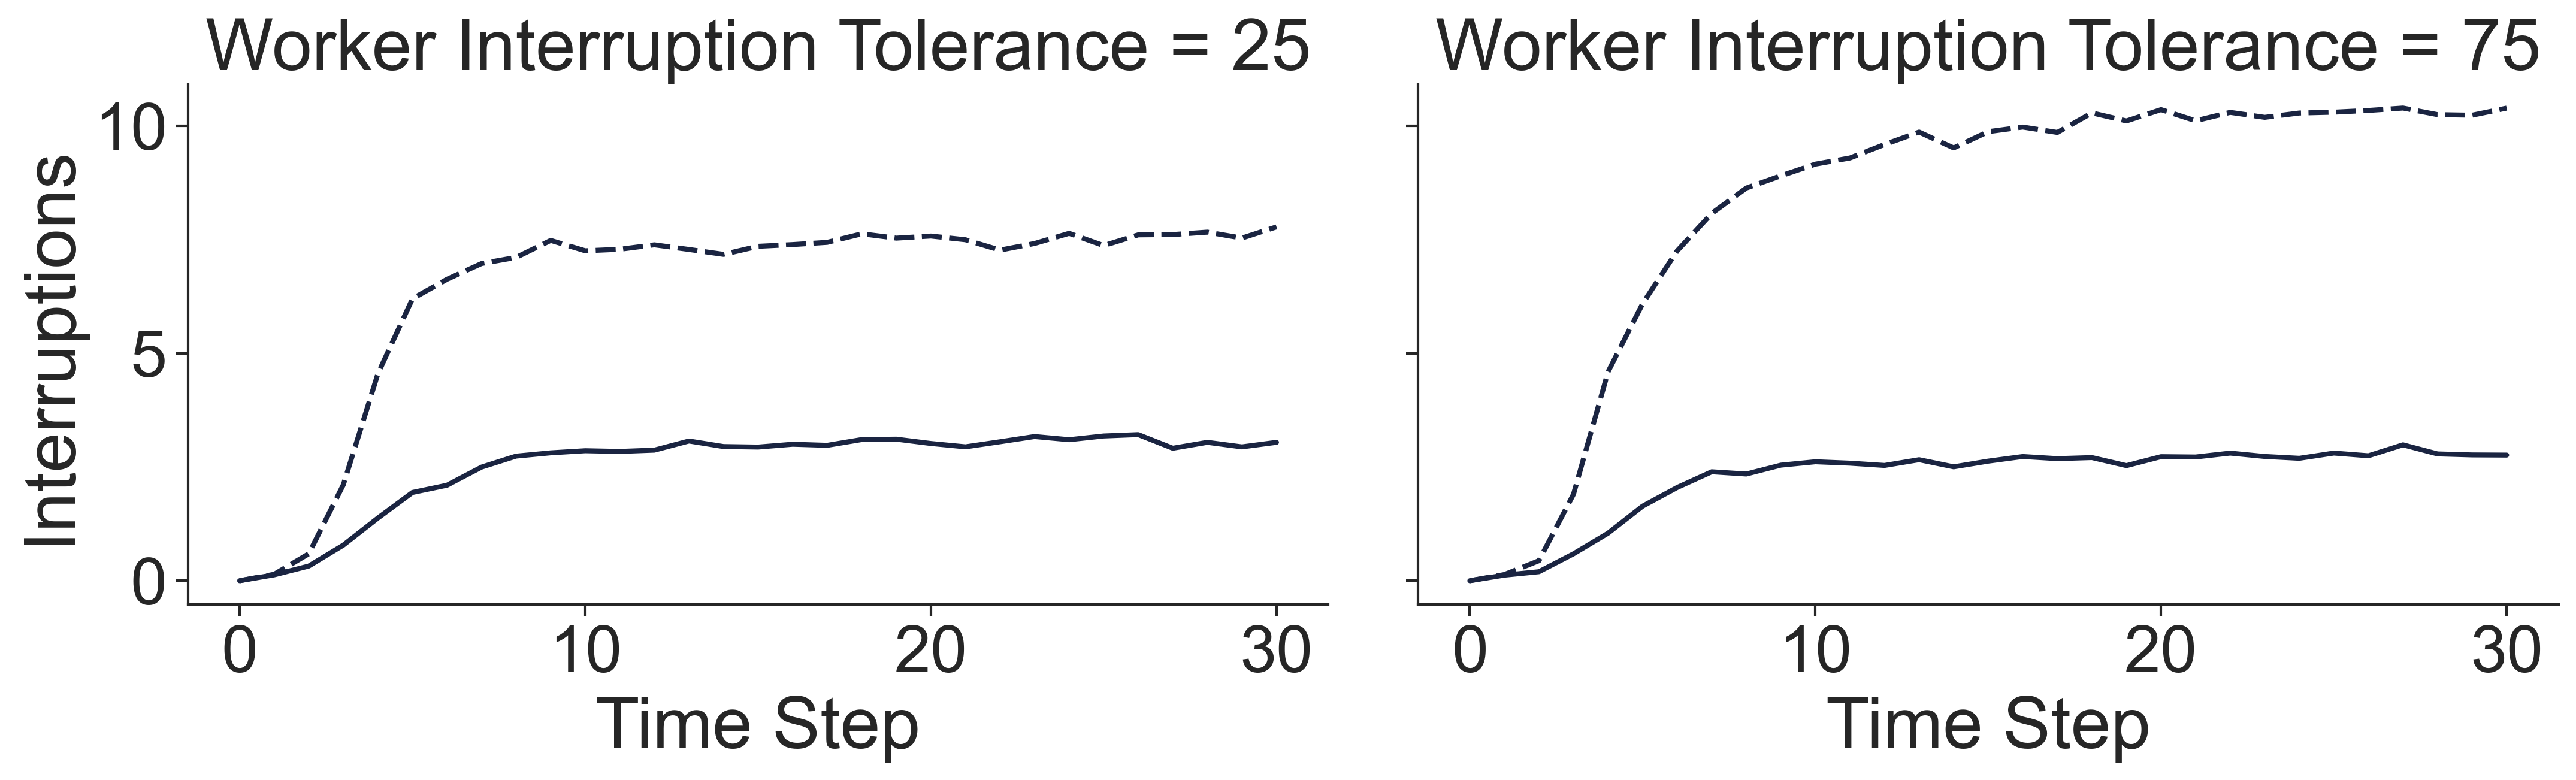

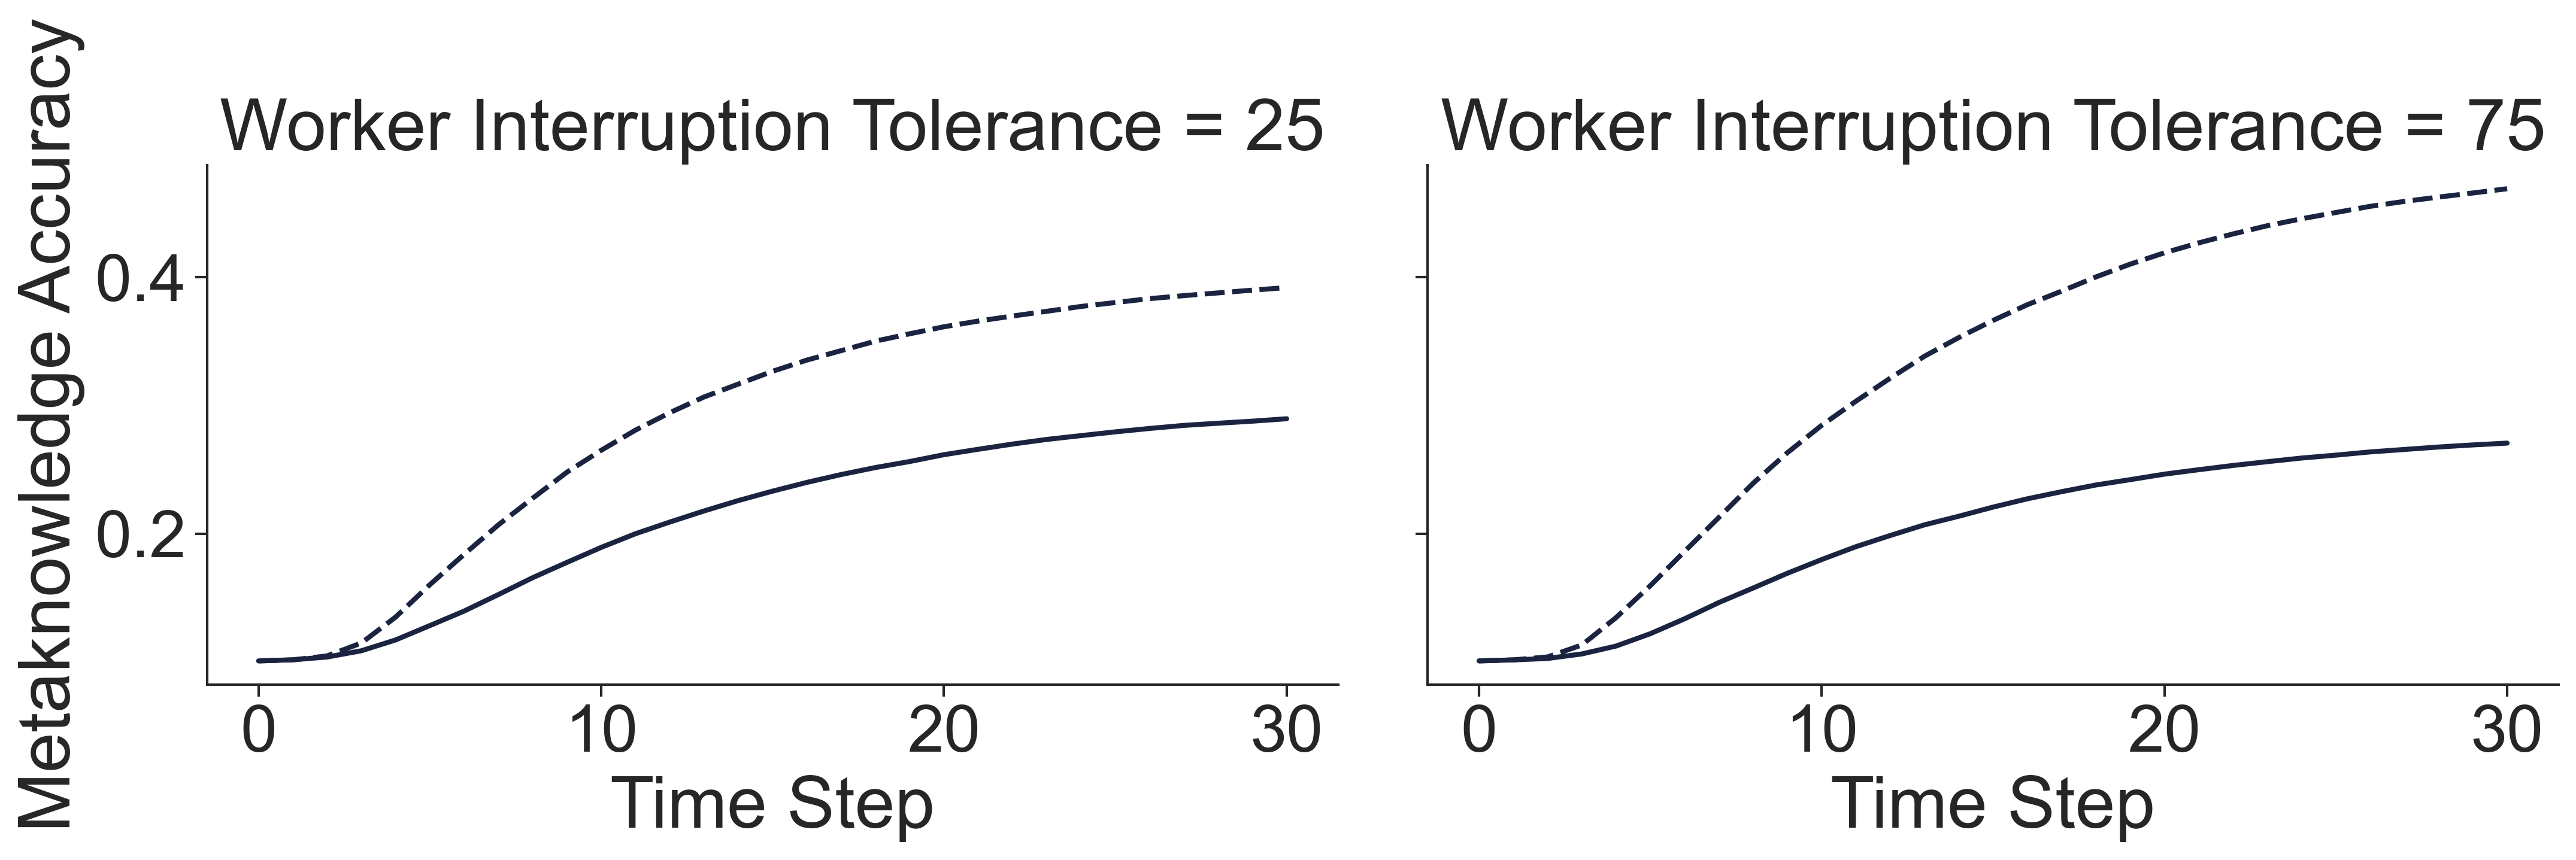

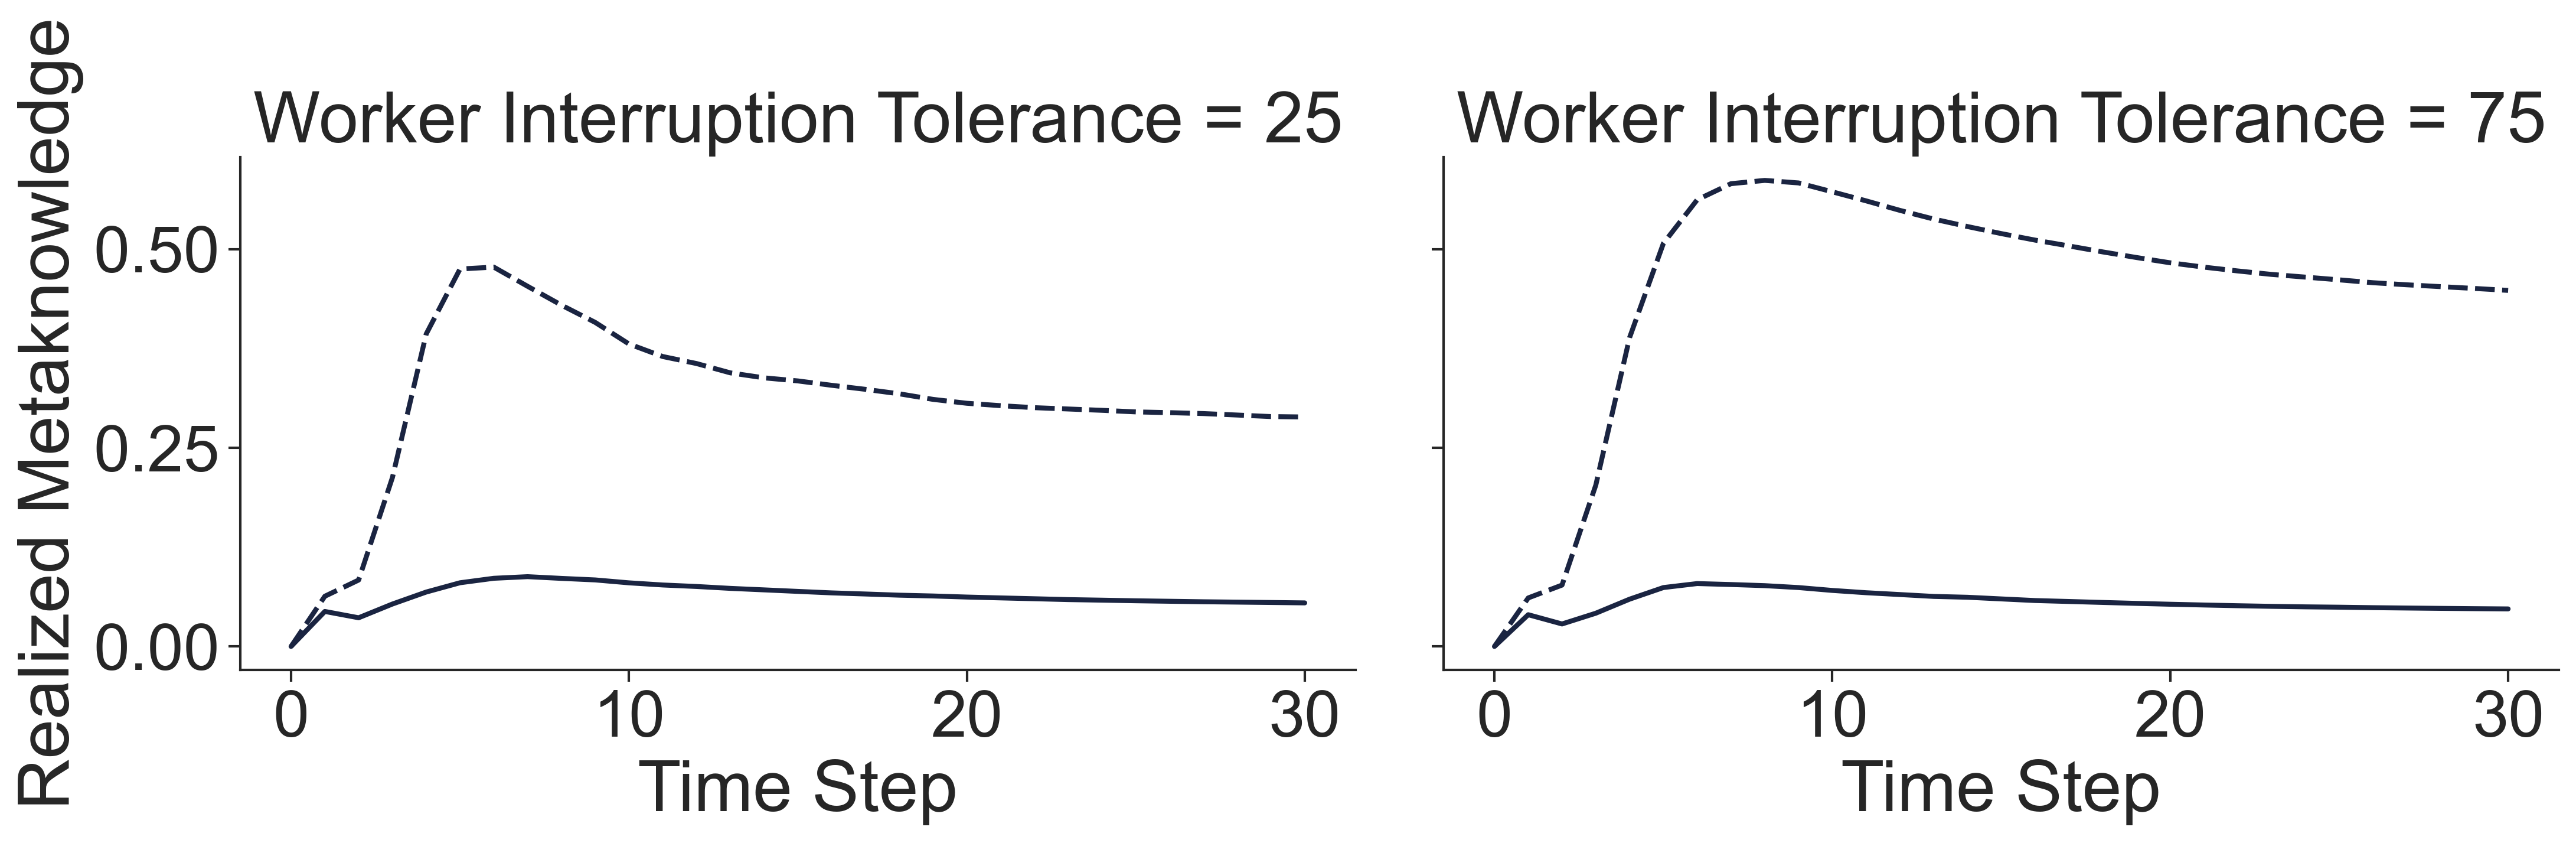

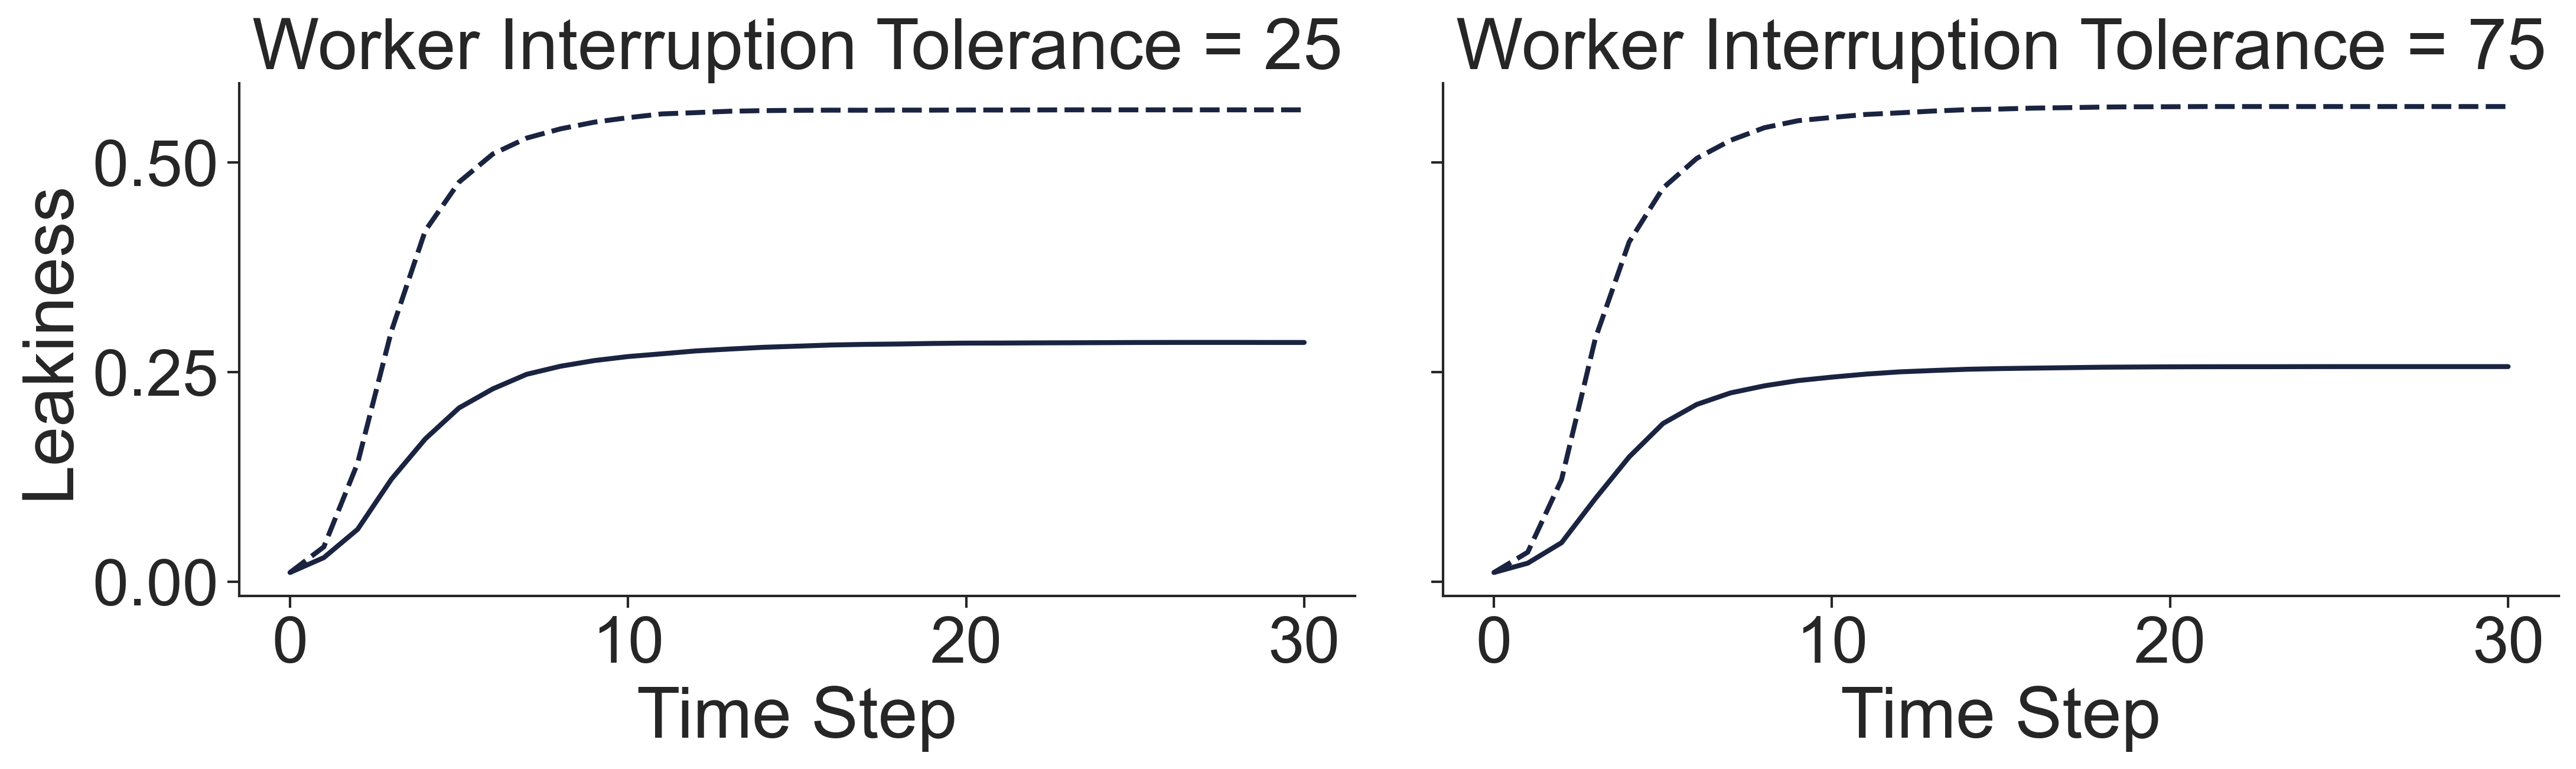

In [9]:
plot_his(data1,  legend=False,)

## ESM Interactivity == 0.9

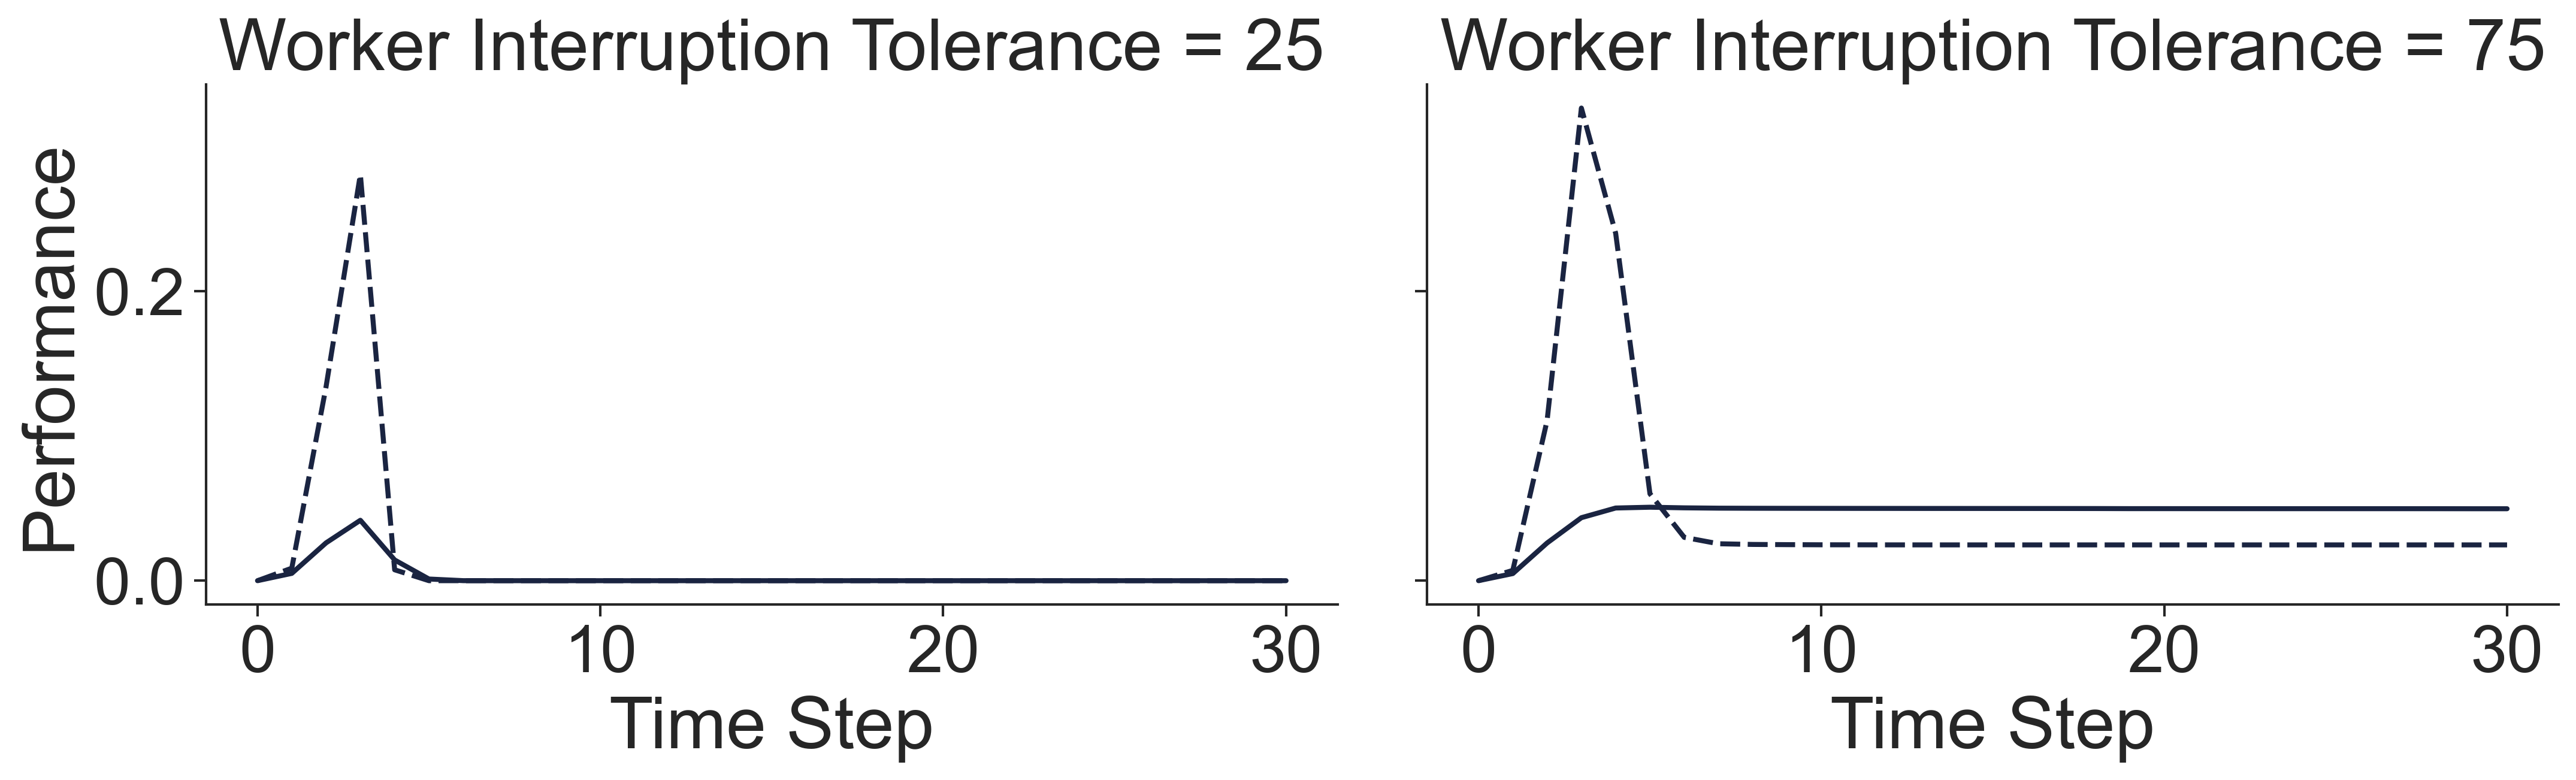

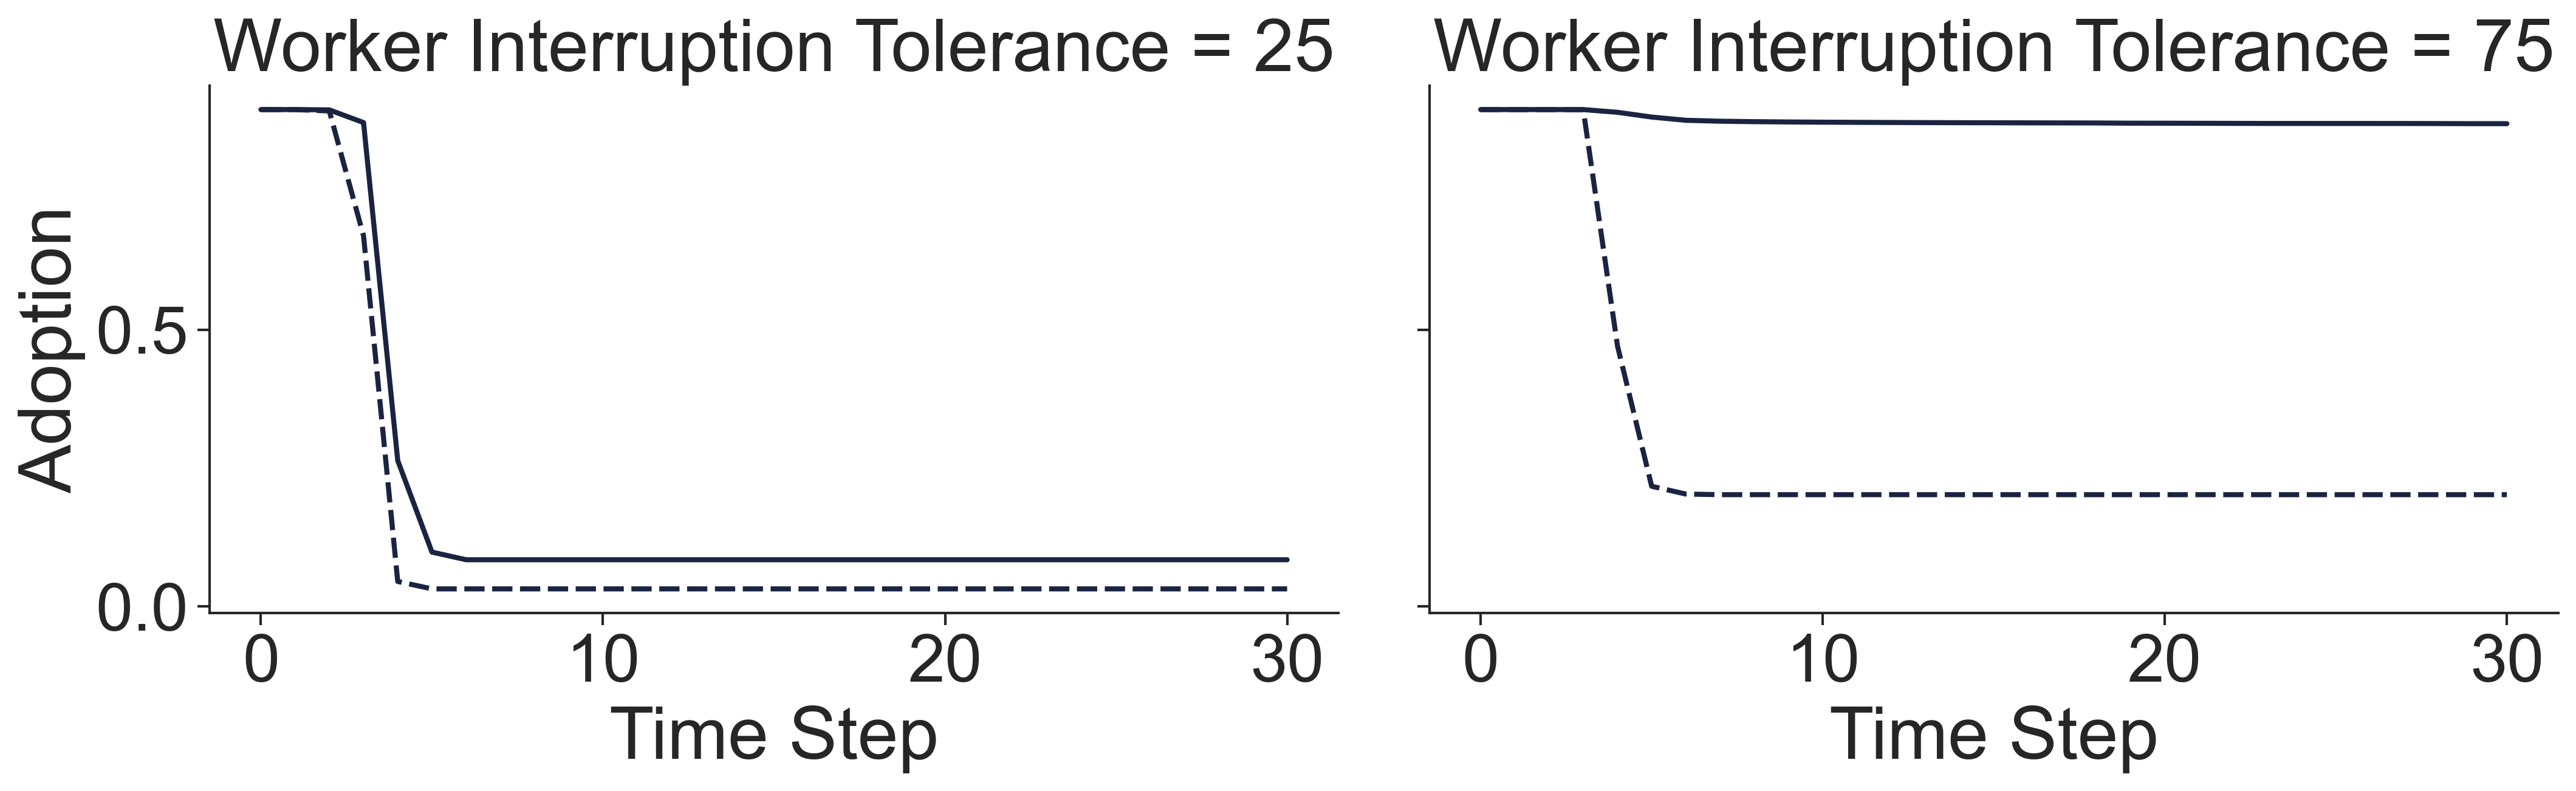

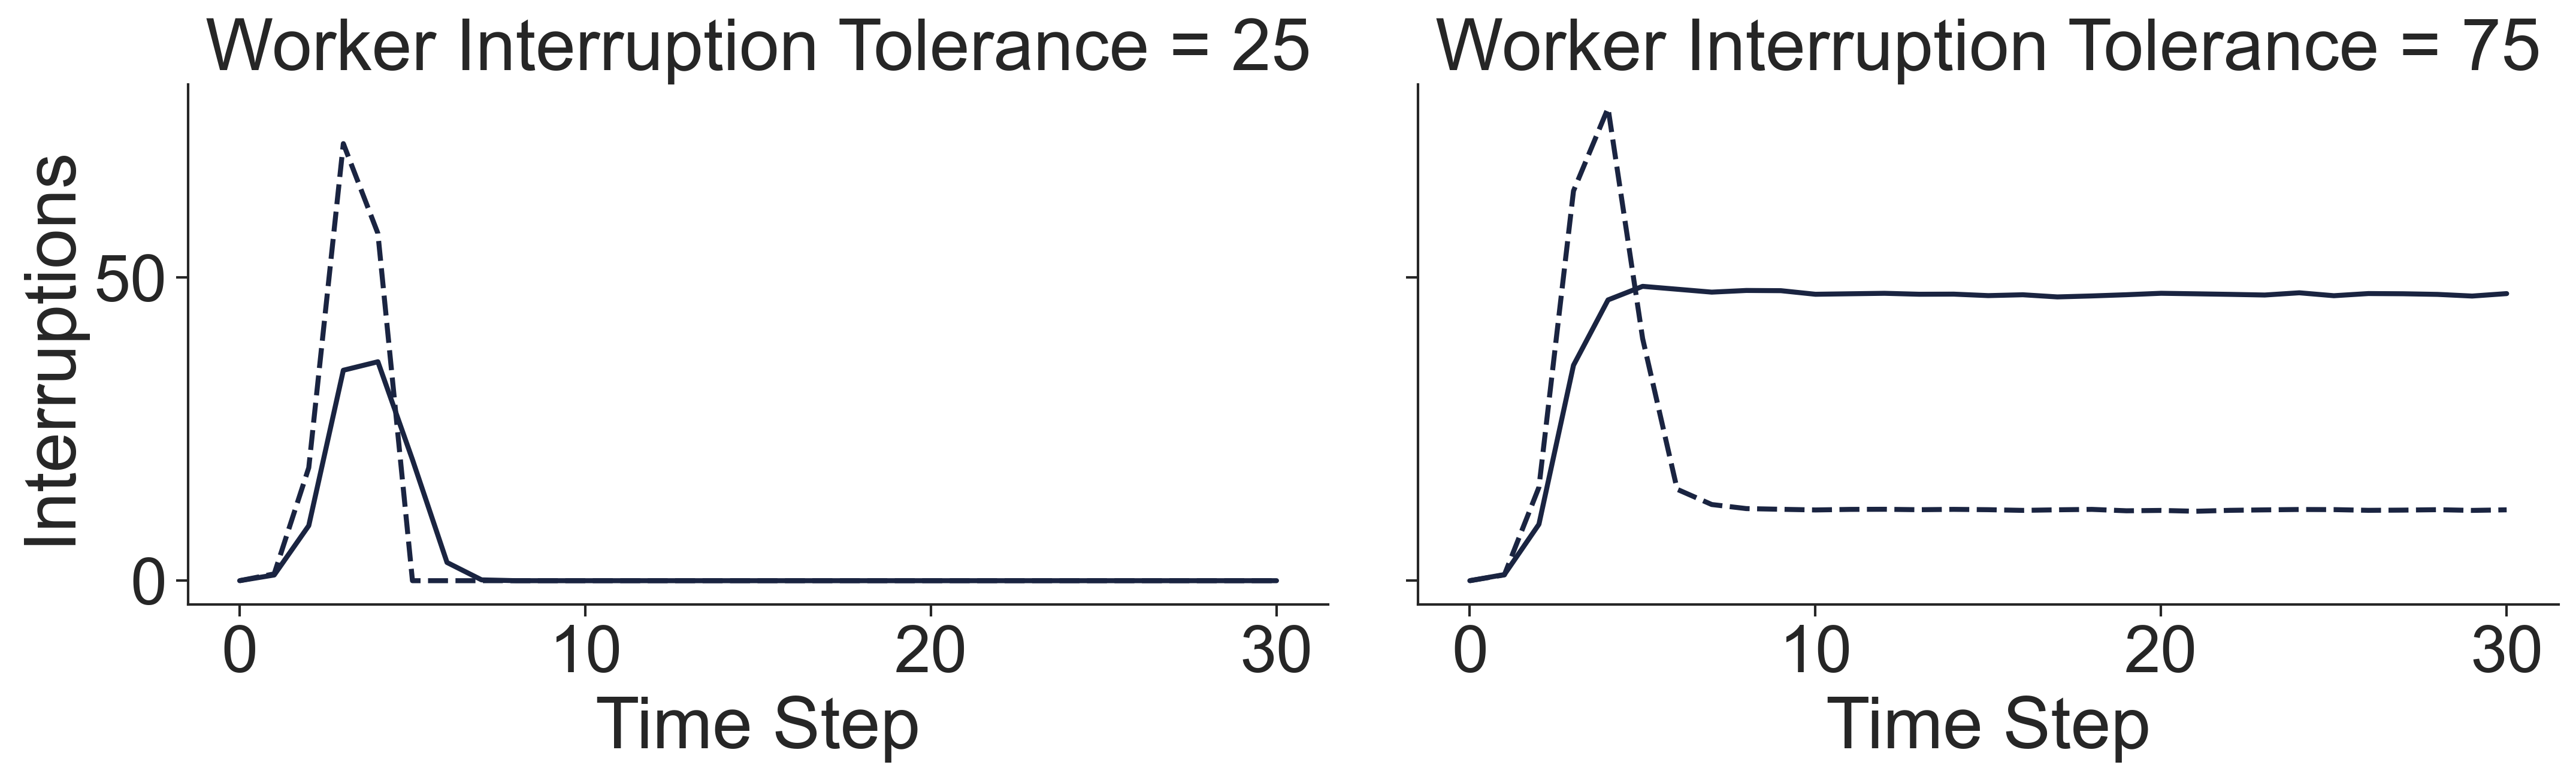

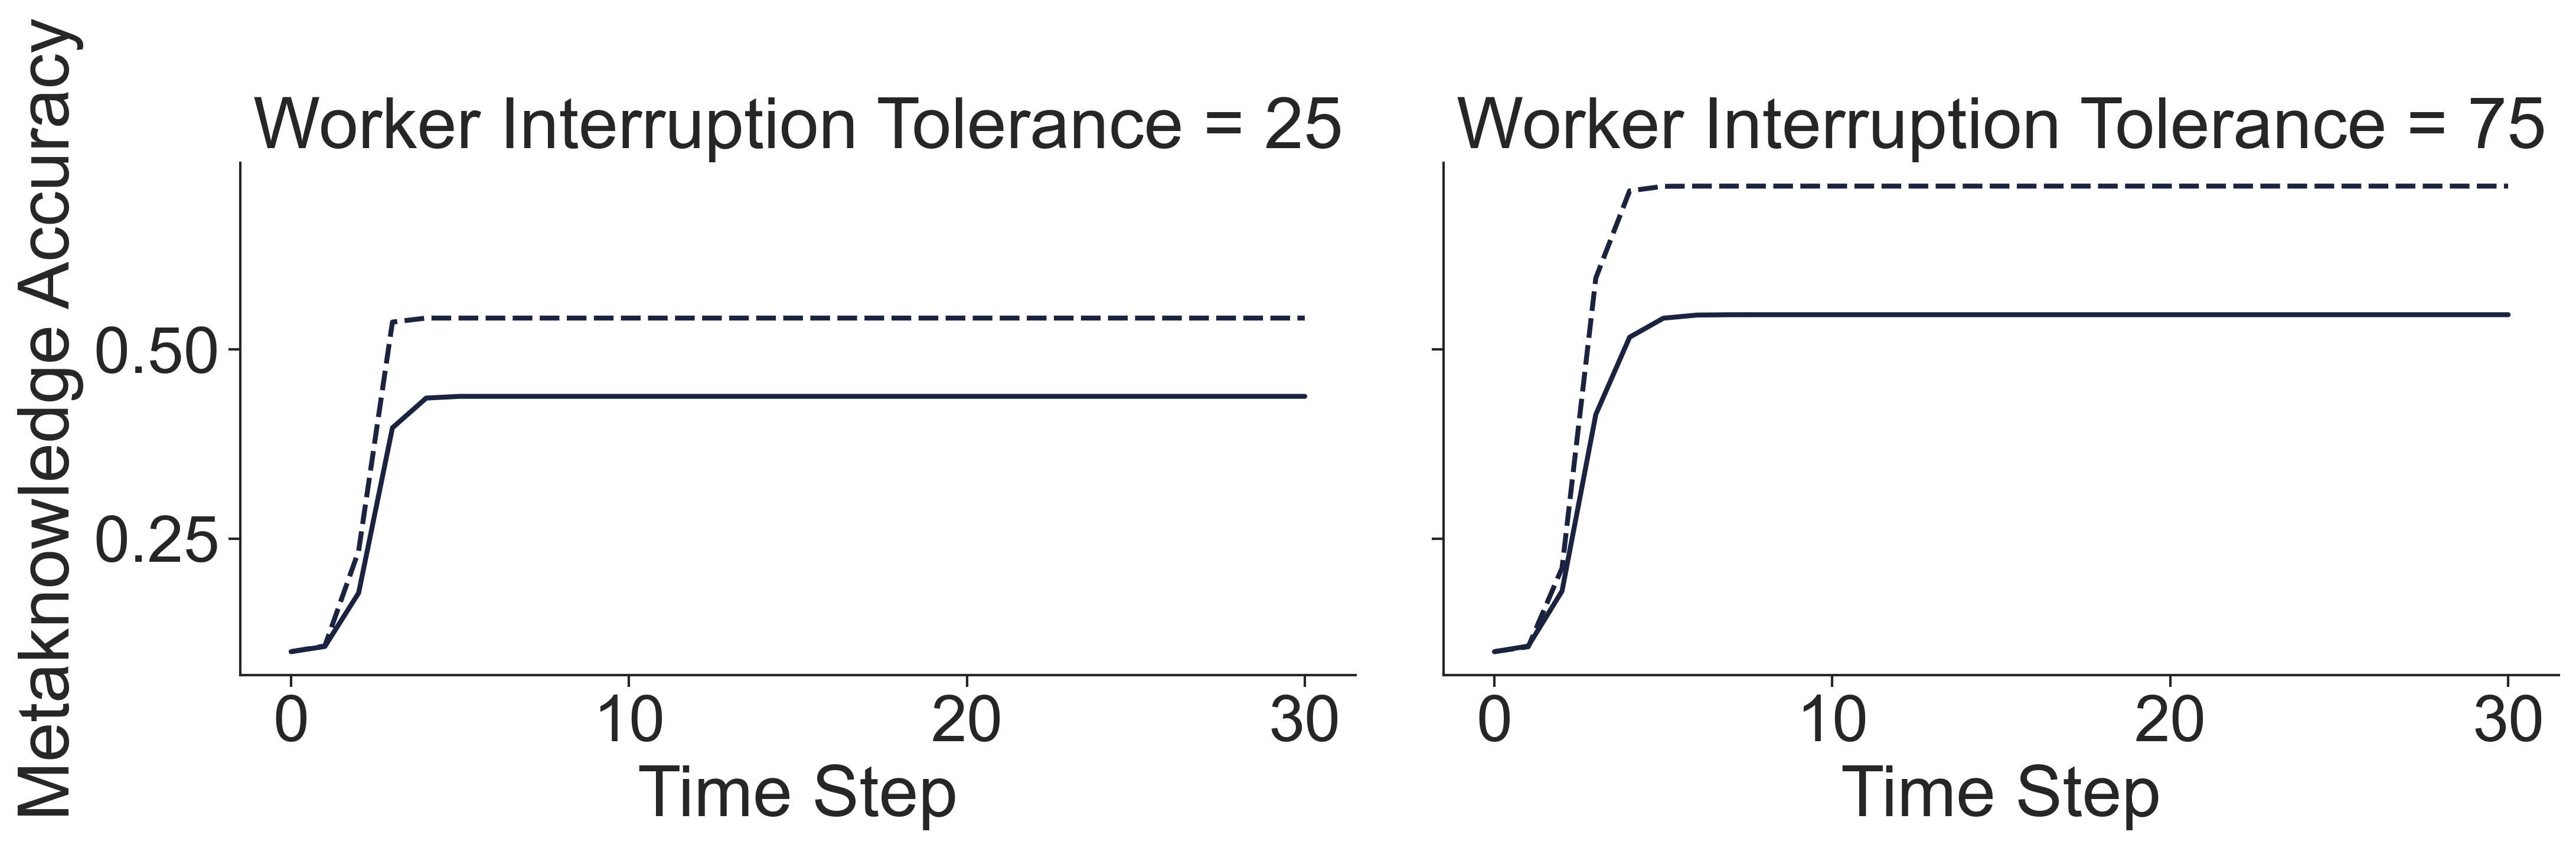

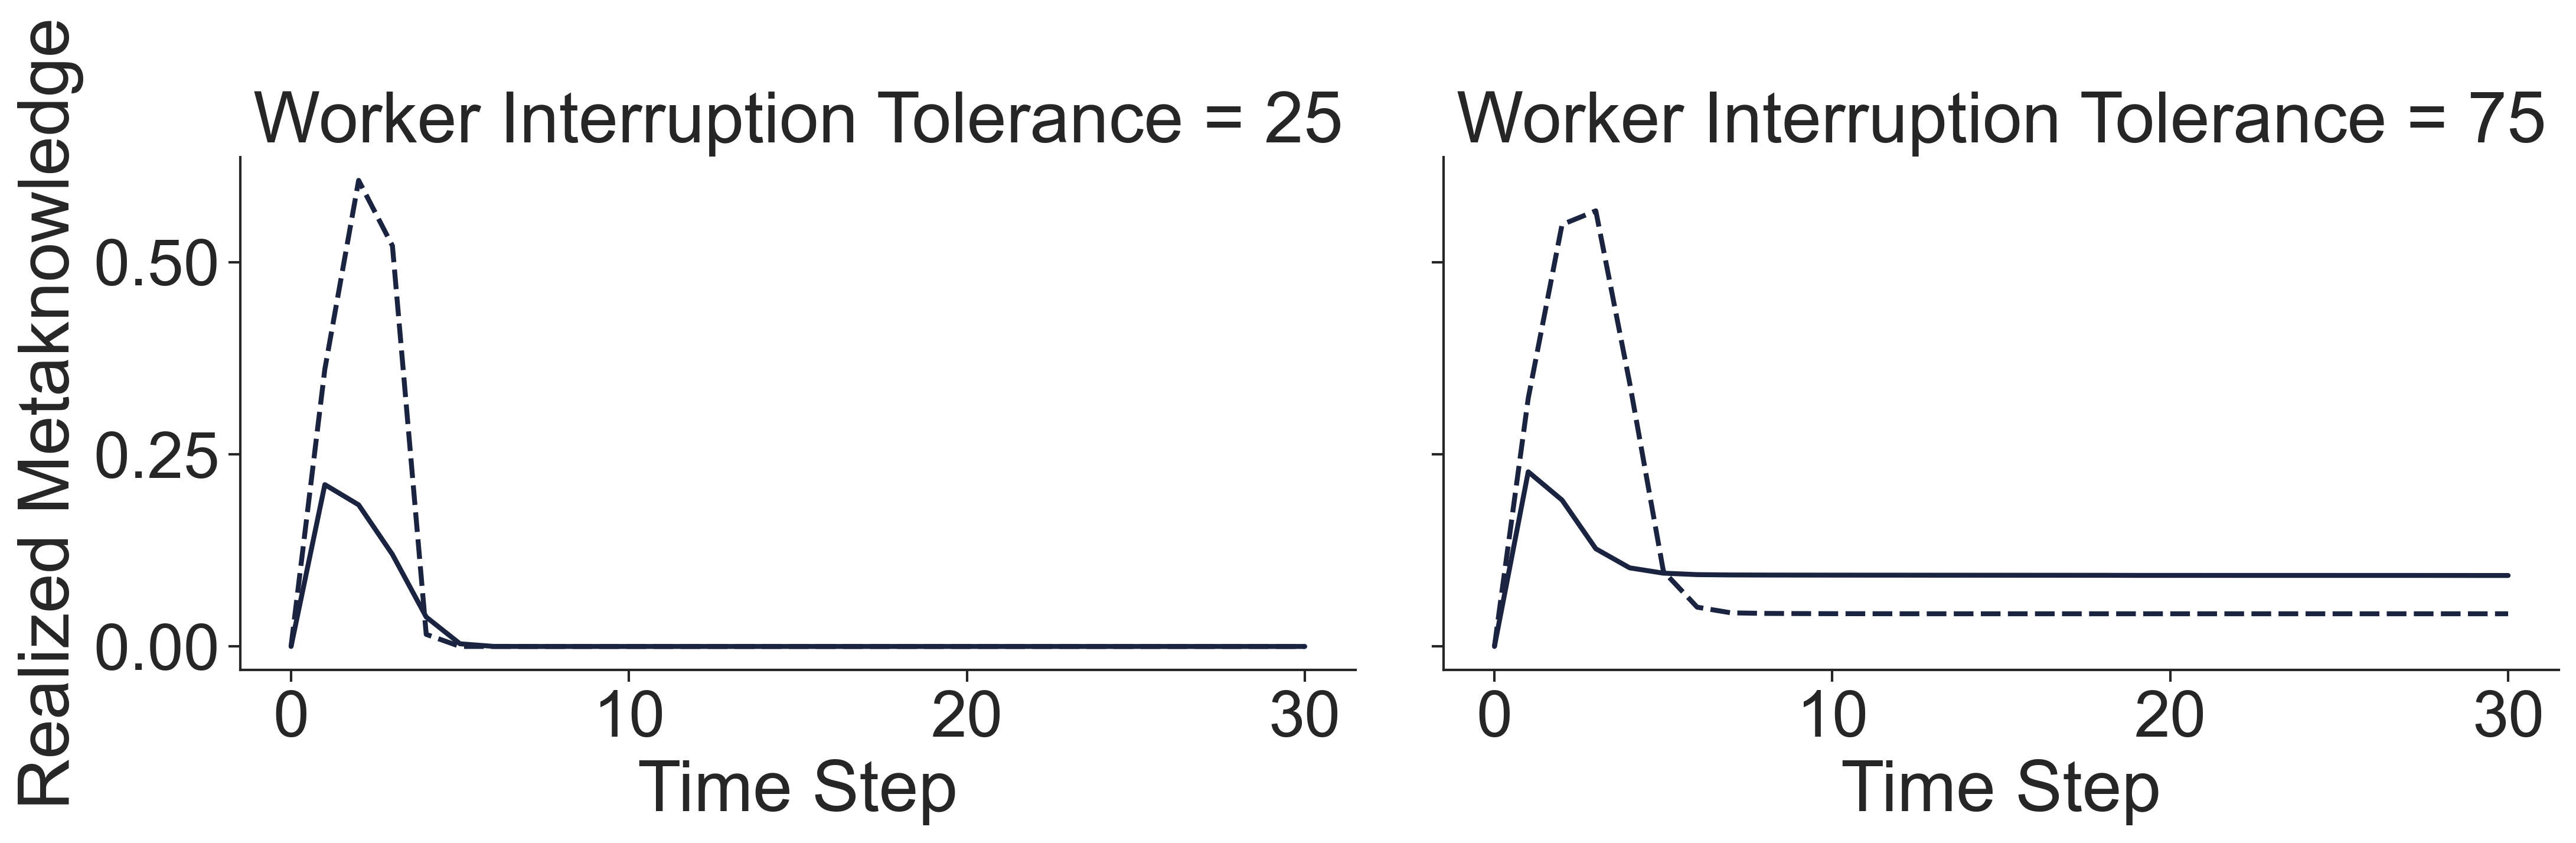

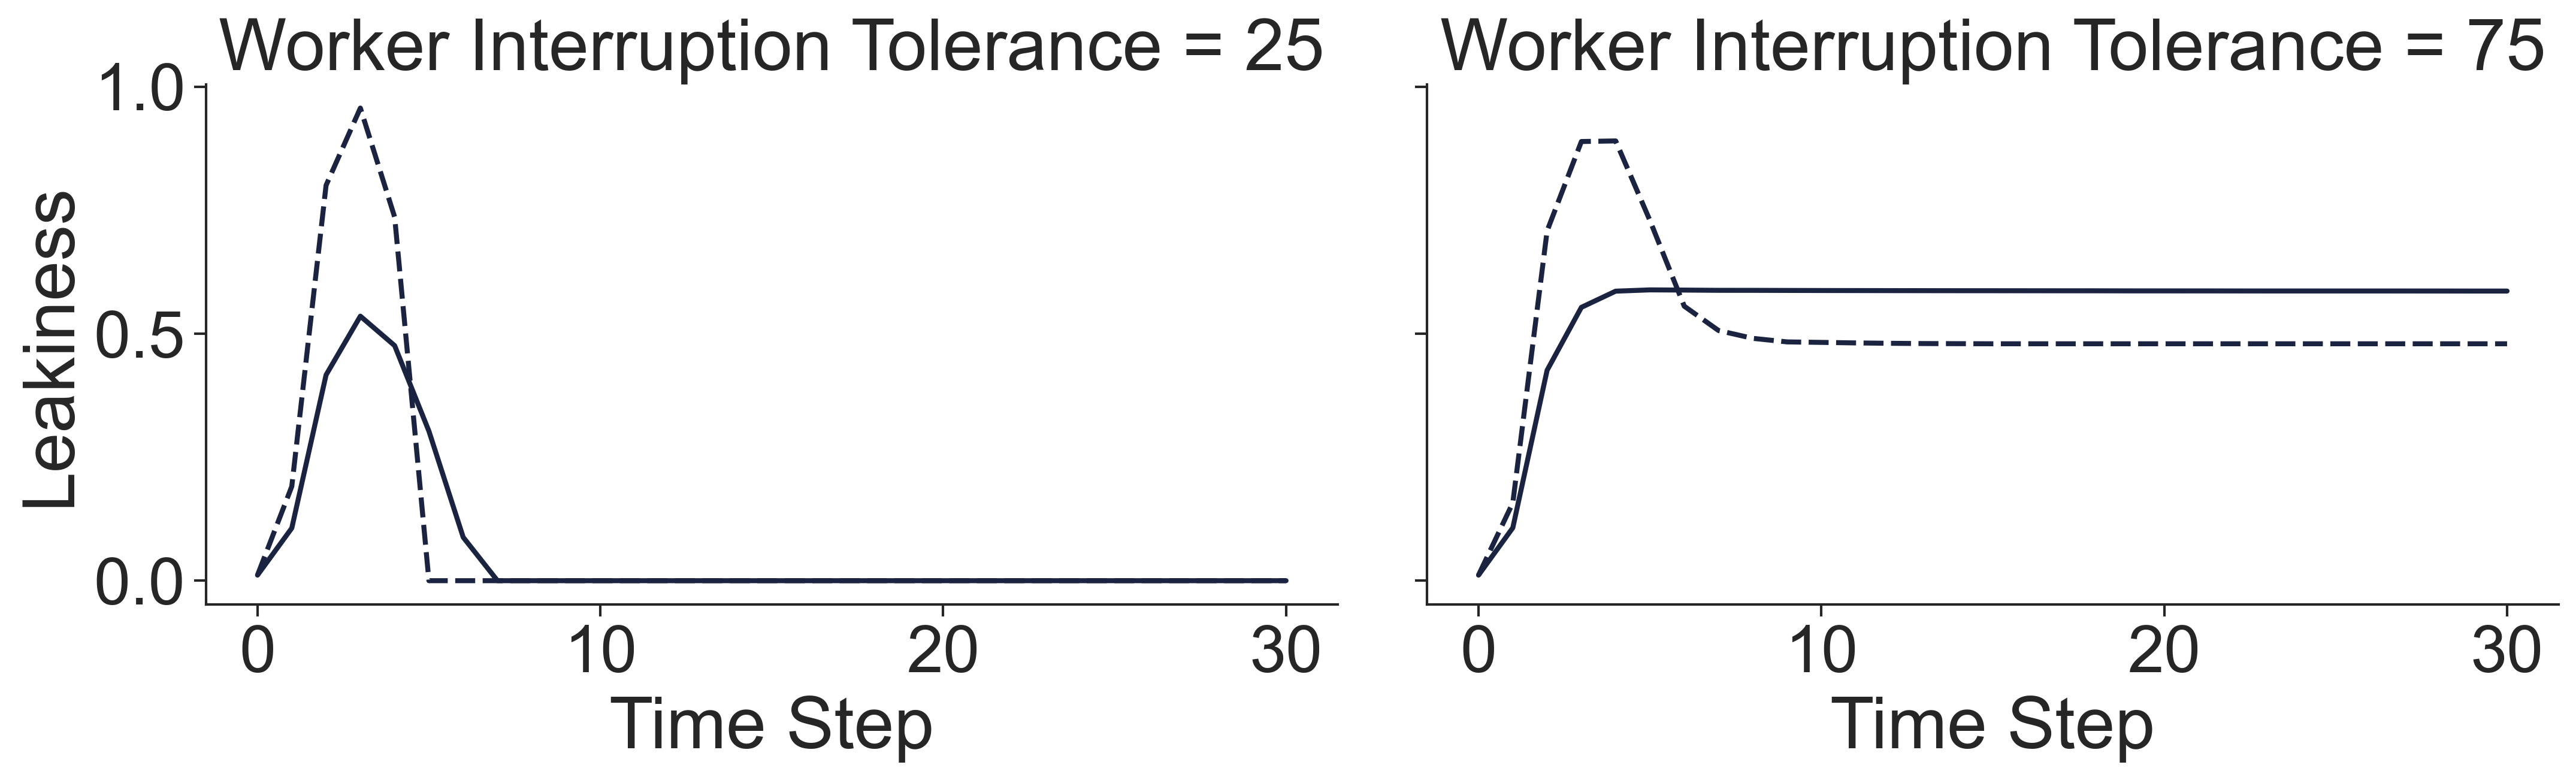

In [10]:
plot_his(data3,  legend=False,)